# Final Project

data set from : https://www.kaggle.com/datasets/colearninglounge/gemstone-price-prediction?select=cubic_zirconia.csv

Gemstone price prediction By
1. Nitipume Sukchai      63340500032
2. Phanthat Likitbantoon 63340500040
3. Phufa Boonchuatrong   63340500048

## Data Exploration

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_raw = pd.read_csv('cubic_zirconia.csv')

In [3]:
df_raw.head()


,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [5]:
df_raw.shape

(26967, 11)

In [6]:
di = df_raw.shape
print('Rows : ' + str(di[0]))
print('Columns : ' + str(di[1]))

Rows : 26967
Columns : 11


In [7]:
df_raw.describe(include=['object'])

,cut,color,clarity
count,26967,26967,26967
unique,5,7,8
top,Ideal,G,SI1
freq,10816,5661,6571


In [8]:
df_raw.describe()

,Unnamed: 0,carat,depth,table,x,y,z,price
count,26967.000000,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,13484.000000,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,7784.846691,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,1.000000,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,6742.500000,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,13484.000000,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,20225.500000,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,26967.000000,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [9]:
df_raw.drop(df_raw.columns[0],axis=1, inplace=True)
df_raw.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


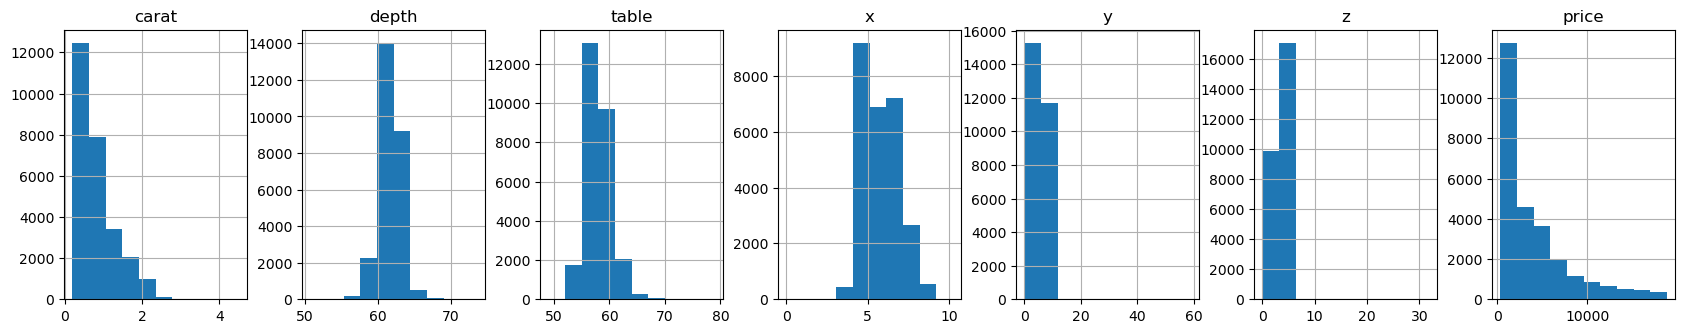

In [10]:
df_raw.hist(layout = (1,len(df_raw.columns)),figsize=(3*len(df_raw.columns),3.5));

Observe
- Feature depth และ table ค่อนข้างมีการกระจายตัวแบบ normal distribution

----
Categorical Feature

In [11]:
categorical_features = ['cut','color','clarity']

In [12]:
df_raw[categorical_features].head()

,cut,color,clarity
0,Ideal,E,SI1
1,Premium,G,IF
2,Very Good,E,VVS2
3,Ideal,F,VS1
4,Ideal,F,VVS1


In [13]:
p = 1
for col in df_raw.select_dtypes(include='object').columns:
    print(str(p) + '.' + col + ' are ' + str(len(df_raw[col].unique())) + ' categories ', end = '')
    print(df_raw[col].unique())
    p+=1

1.cut are 5 categories ['Ideal' 'Premium' 'Very Good' 'Good' 'Fair']
2.color are 7 categories ['E' 'G' 'F' 'D' 'H' 'J' 'I']
3.clarity are 8 categories ['SI1' 'IF' 'VVS2' 'VS1' 'VVS1' 'VS2' 'SI2' 'I1']


Explain Features
1. cut คือ คุณภาพหลังการเจียระไน มีการเรียงรดับจากดีถึงไม่ดี ดังนี้ Ideal, Premium, Very Good, Good, Fair
2. color คือ สีของ cubic zirconia โดยเรียงจาก D-J (best-worst)
3. clarity คือ ความสะอาดของเพชร มีลำดับการเรียงจากสะอาดมากไปสะอาดน้อยดังนี้ IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1

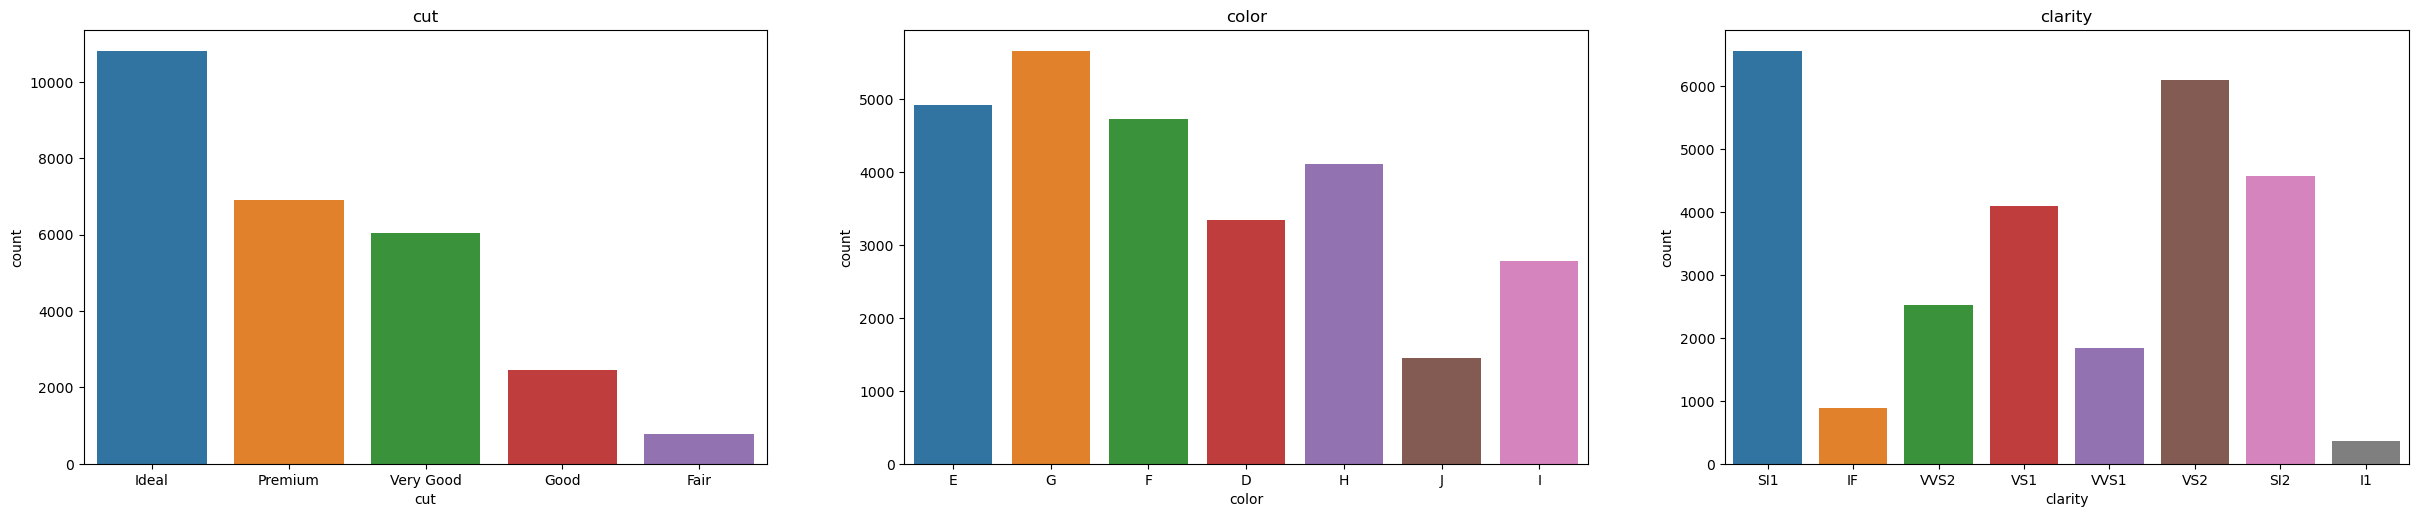

In [14]:
plt.figure(figsize=(30,80), facecolor='white')
plotnumber =1
for c in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(x=c,data=df_raw)
    plt.xlabel(c)
    plt.title(c)
    
    plotnumber+=1
plt.show()

In [15]:
print('cut\n',df_raw.cut.value_counts())
print('color\n',df_raw.color.value_counts())
print('clarity\n',df_raw.clarity.value_counts())

cut
 Ideal        10816
Premium       6899
Very Good     6030
Good          2441
Fair           781
Name: cut, dtype: int64
color
 G    5661
E    4917
F    4729
H    4102
D    3344
I    2771
J    1443
Name: color, dtype: int64
clarity
 SI1     6571
VS2     6099
SI2     4575
VS1     4093
VVS2    2531
VVS1    1839
IF       894
I1       365
Name: clarity, dtype: int64


Observe
- Feature cut มีจำนวน gem ระดับ Ideal มากที่สุด 
- Feature color มีจำนวน gem ที่มีคุณภาพสีระดับ G มากที่สุด
- Feature clarity มีจำนวน gem ที่มีระดับความสะอาดระดับ SI1 มากที่สุด



----
Numerical Feature

In [16]:
numerical_features = ['carat','depth','table','x','y','z','price']

In [17]:
df_raw[numerical_features].head()

,carat,depth,table,x,y,z,price
0,0.30,62.1,58.0,4.27,4.29,2.66,499
1,0.33,60.8,58.0,4.42,4.46,2.70,984
2,0.90,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,60.4,59.0,4.35,4.43,2.65,779


Explain Features
1. carat คือ หน่วยในการวัดระดับของน้ำหนักอัญมณีต่างๆ (1 carat = 0.2 g) 
2. depth คือ อัตราส่วนของความสูงเทียบกับความกว้าง (%)
3. table คือ ความกว้างของยอดเพชรคิดจากเส้นผ่านศูนย์กลางเฉลี่ย (%)
4. x คือ ความยาว (mm)
5. y คือ ความกว้าง (mm)
6. z คือ ความสูง (mm)
7. price คือ ราคา (Dolllar)

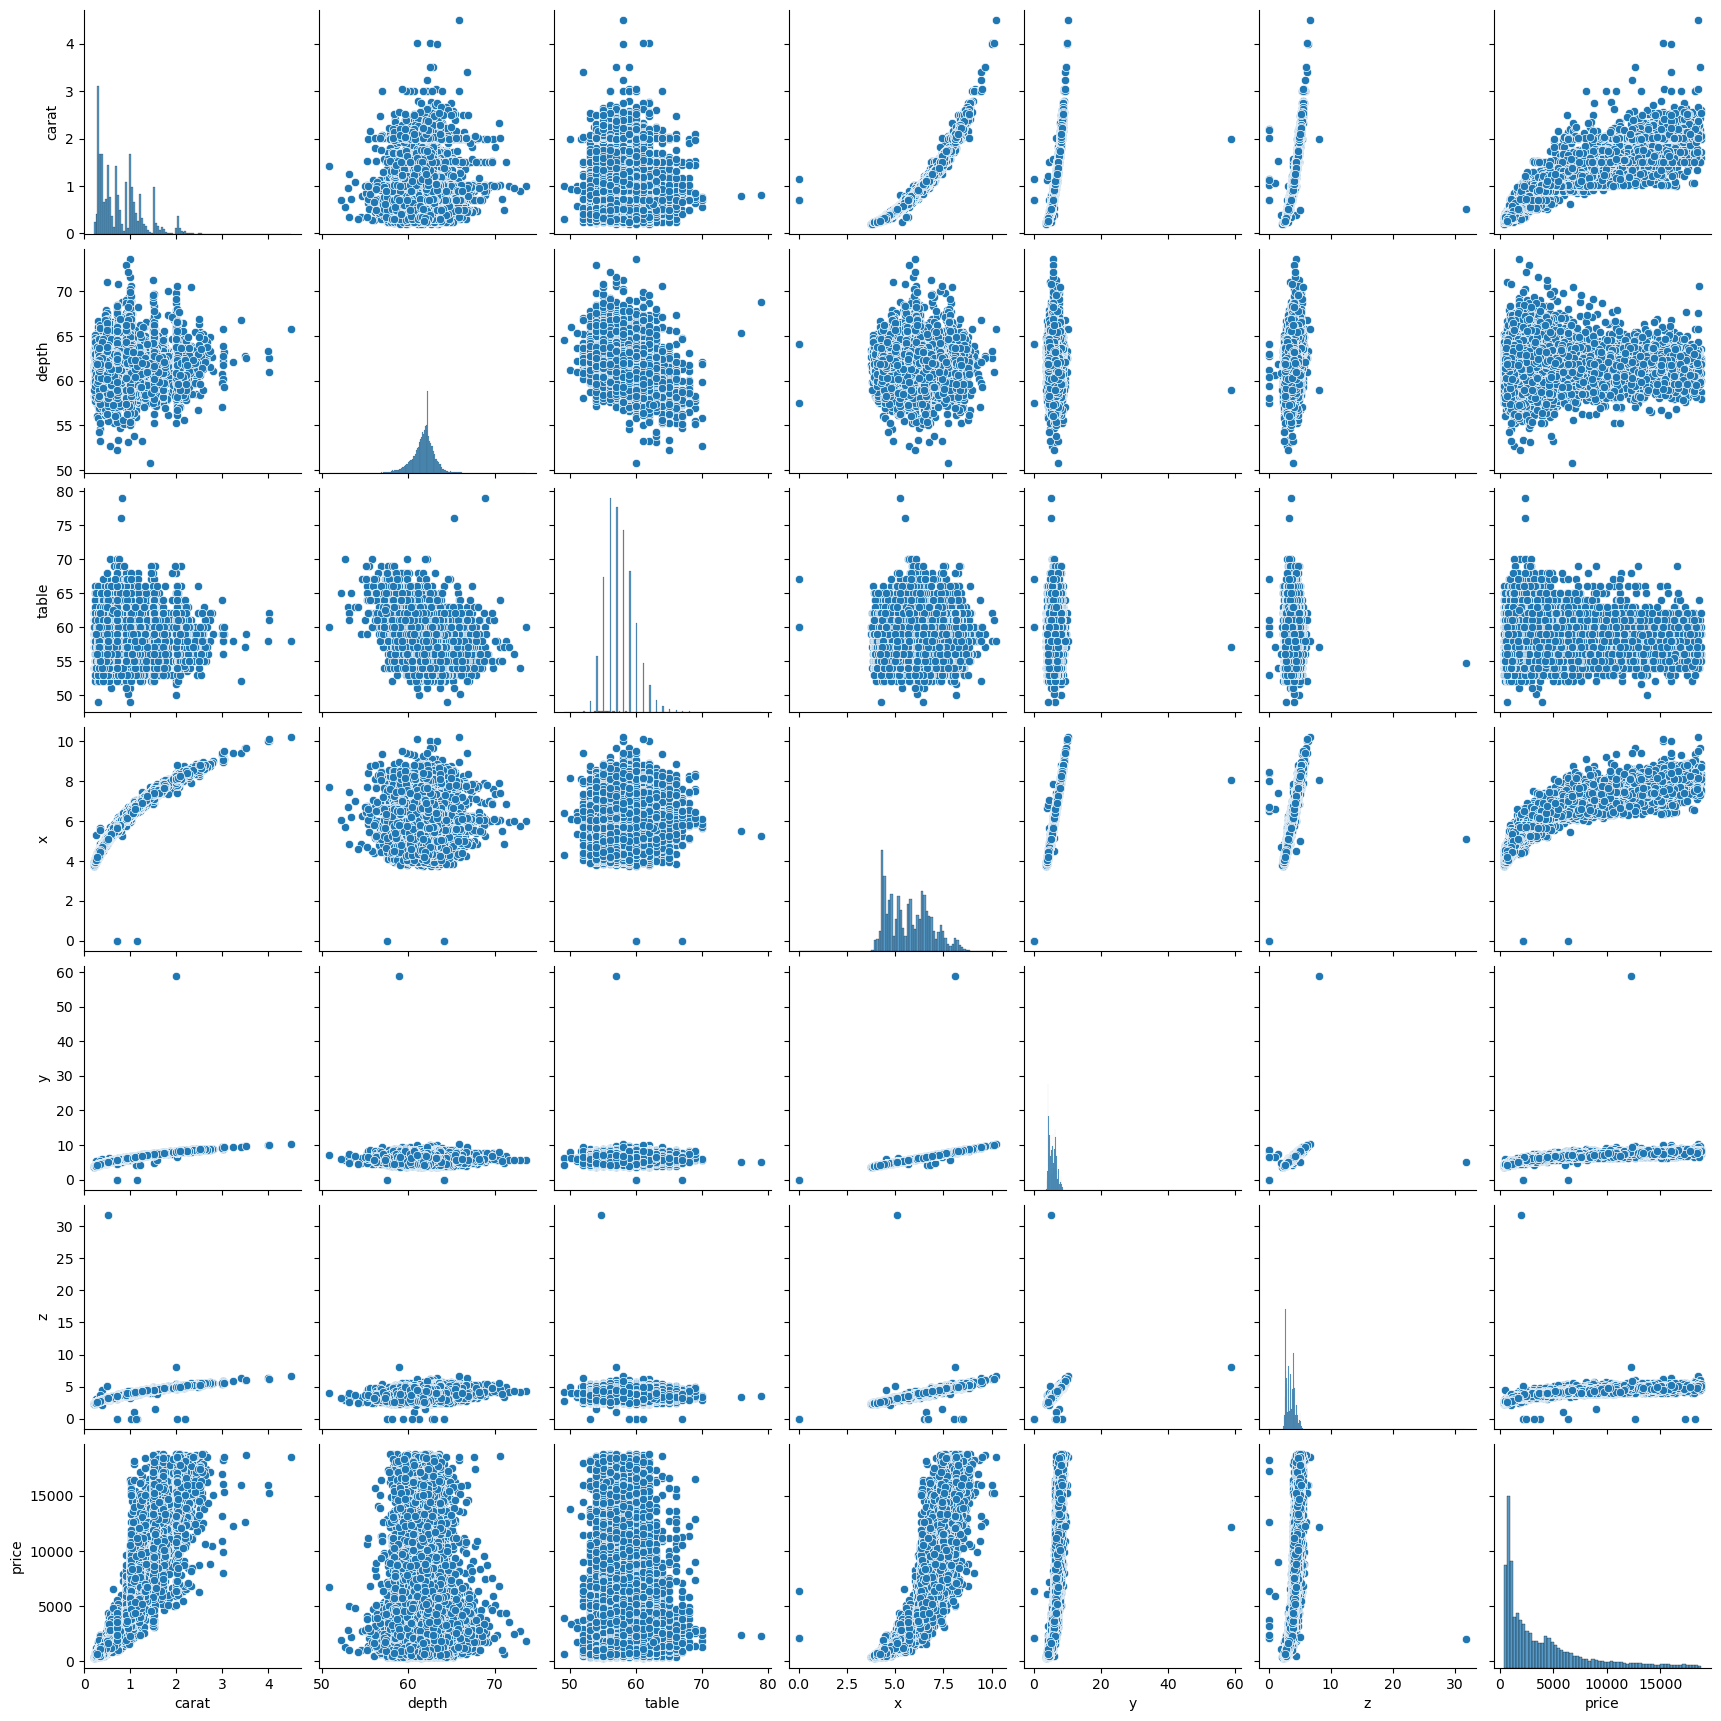

In [18]:
sns.pairplot(df_raw)

Observe
- Y และ Z มีลักษณะการกระจายตัวของข้อมูลที่คล้ายกันเมื่อเทียบกับทุก Feature
- carat และ X มีลักษณะข้อมูลที่คล้ายกันแต่อยู่ในคนละช่วงมื่อเทียบกับ price

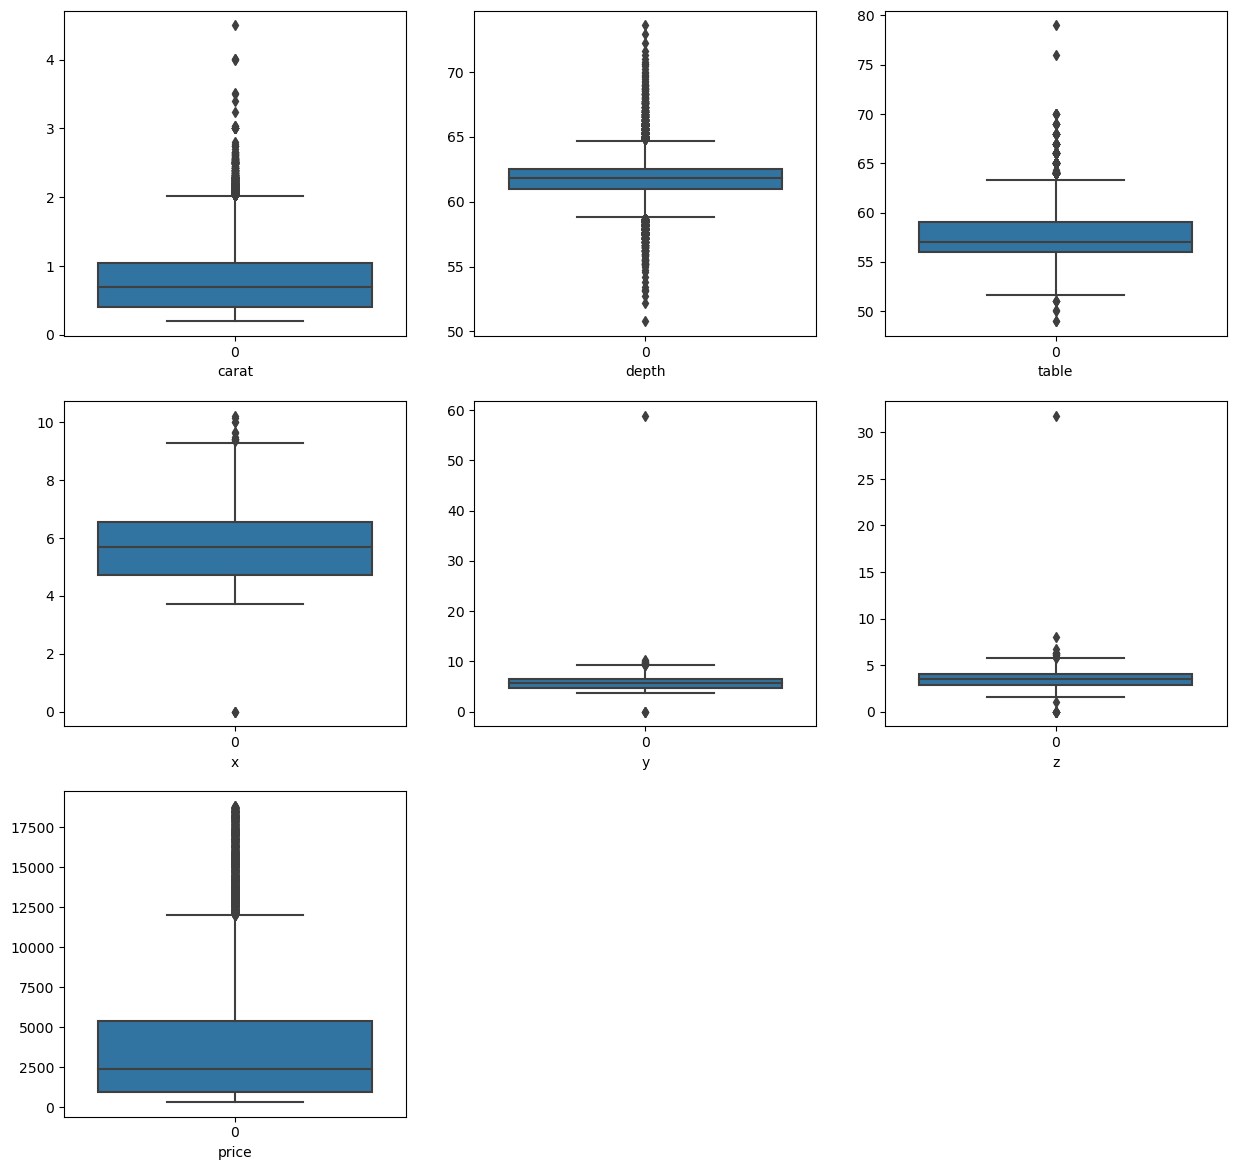

In [19]:
plt.figure(figsize=(15,60), facecolor='white')
plotnumber =1
for feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df_raw[feature],whis=1.5)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

Observe
- X Y Z มีข้อมูลที่เป็น outlier 
- carat ของ gem ส่วนใหญ่มีน้ำหนักที่น้อย
- price ของ gem ส่วนใหญ่มีราคาที่น้อย

<AxesSubplot:>

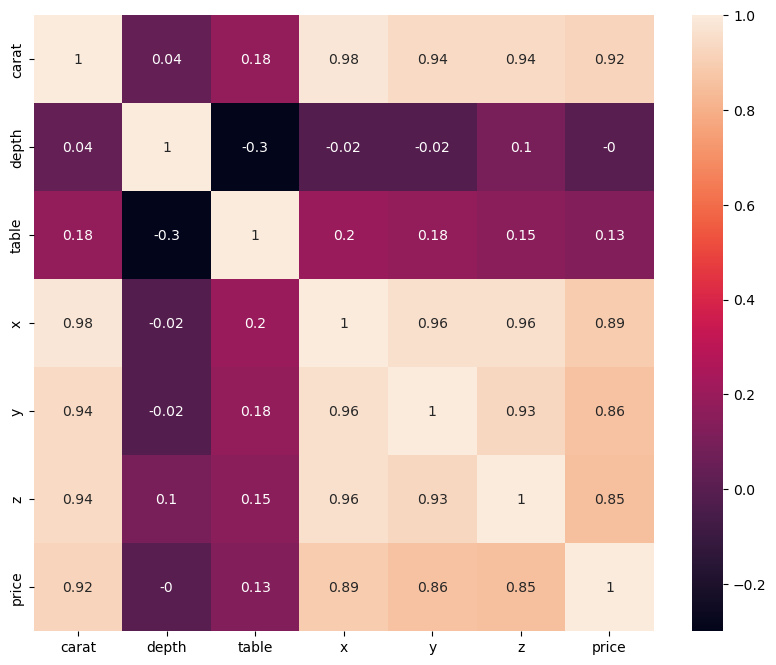

In [20]:
cormat = df_raw.corr()

plt.figure(figsize=(10,8))
sns.heatmap(cormat.round(2), annot = True)

Observe
- carat, X, Y, Z และ price มีความสัมพันธ์กันในเชิง positive
- depth ไม่มีความสัมพันธ์กับ price


----
Categorical and Numerical

1. cut with all numerical feature 


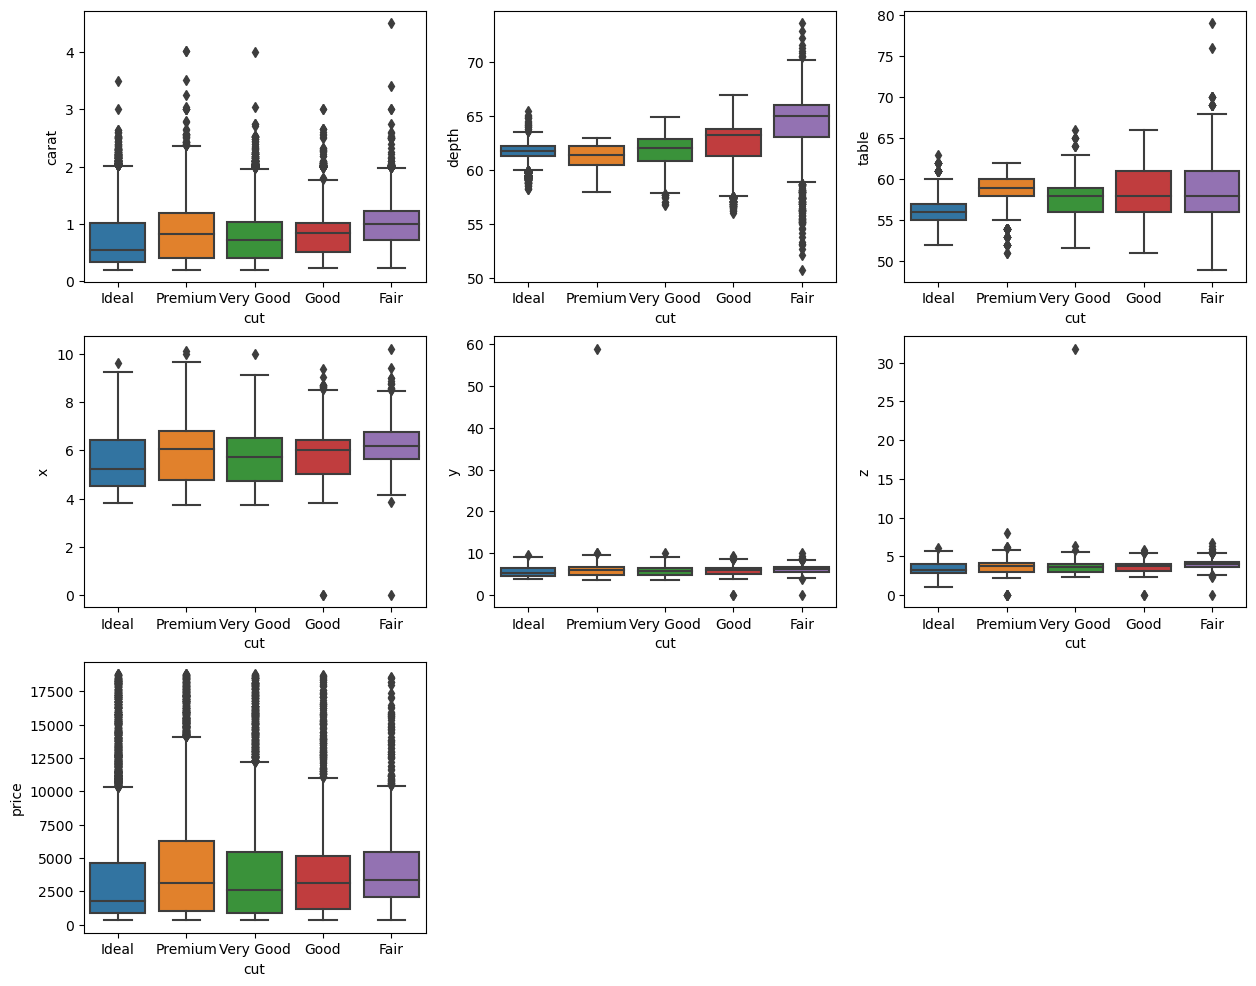

In [21]:
plt.figure(figsize=(15,50), facecolor='white')
plotnumber =1
for feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x='cut', y= df_raw[feature], data=df_raw)
    plt.xlabel('cut')
    plotnumber+=1
plt.show()

Observe
- เมื่อเทียบ cut กับ depth และ table จะเห็นช่วงของข้อมูลที่ค่อนข้างชัดว่า gem คุณภาพดีจะมีช่วง depth และ table เท่าไหร่

2. color with all numerical feature 

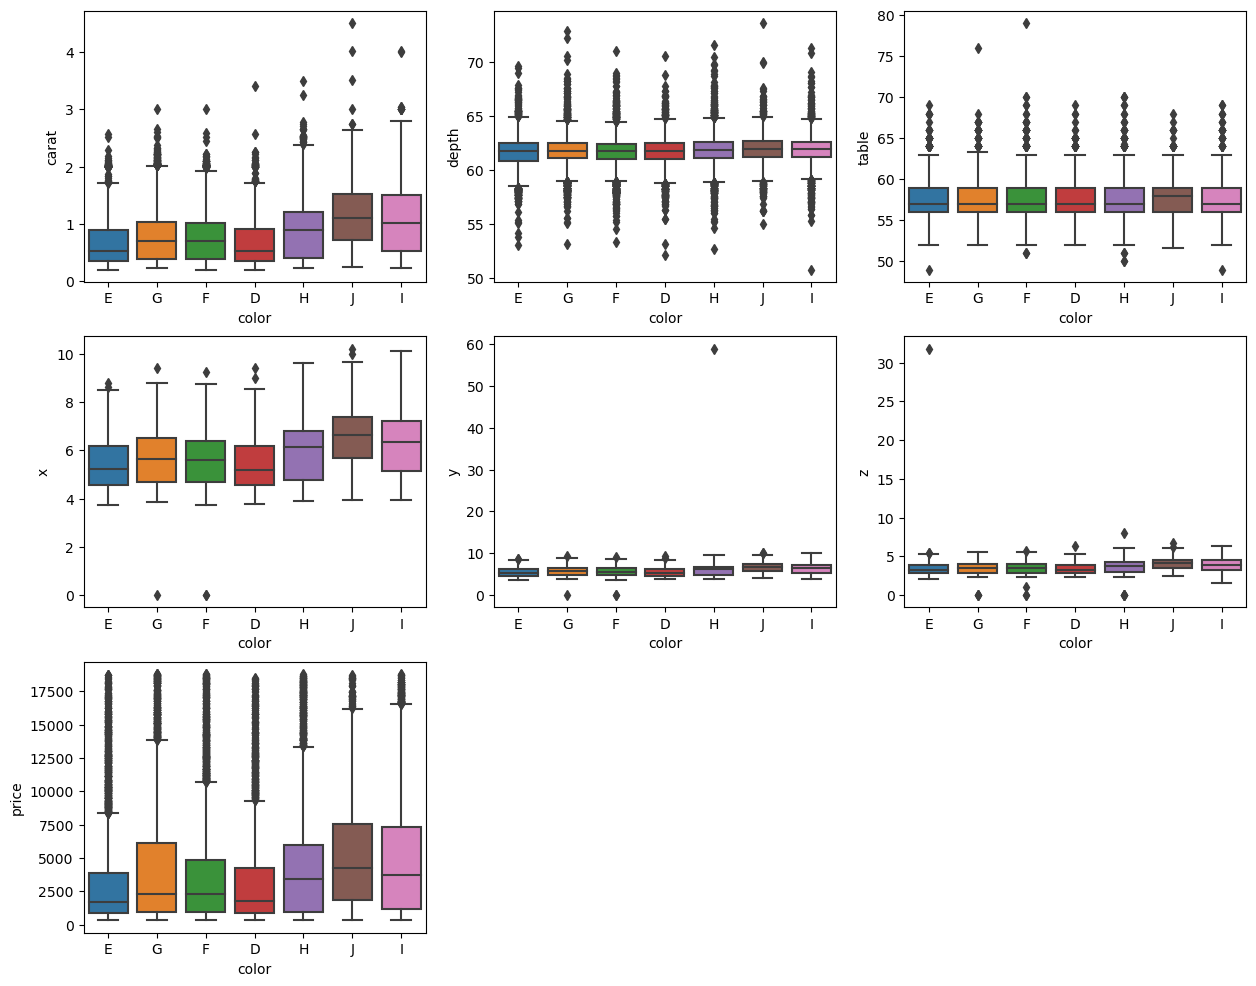

In [22]:
plt.figure(figsize=(15,50), facecolor='white')
plotnumber =1
for feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x='color', y= df_raw[feature], data=df_raw)
    plt.xlabel('color')
    plotnumber+=1
plt.show()

Observe 
- สีคุณภาพ J (worst) จะค่อนข้างโดดเด่นกับทุก feature เมื่อเทียบกับสีอื่น

3. clarity with all numerical feature 

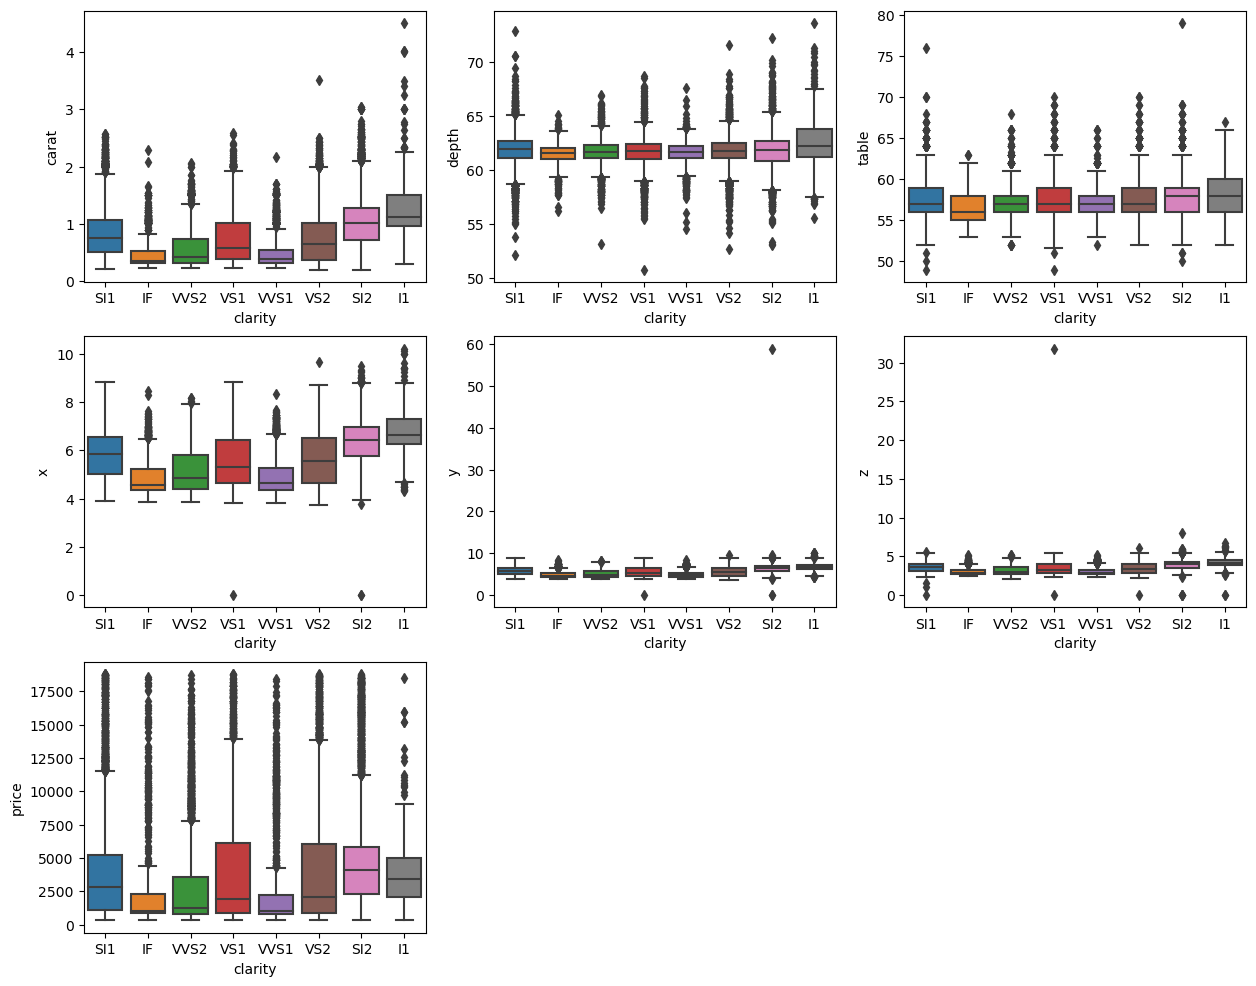

In [23]:
plt.figure(figsize=(15,50), facecolor='white')
plotnumber =1
for feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x='clarity', y= df_raw[feature], data=df_raw)
    plt.xlabel('clarity')
    plotnumber+=1
plt.show()

Observe
- gem ที่มีความสะอาดเมื่อเทียบกับทุก feature แล้วจะมีค่าที่ค่อยข้างต่ำ สังเกตได้ชัดเจนจาก carat และ price

Insight of data

In [24]:
at = pd.DataFrame(df_raw['z']/( (df_raw['x'] + df_raw['y'])/2)*100 ,columns=['cal_depth'])
compare = pd.DataFrame([at['cal_depth'],df_raw['depth']]).T
compare.head()

,cal_depth,depth
0,62.149533,62.1
1,60.810811,60.8
2,62.171053,62.2
3,61.538462,61.6
4,60.364465,60.4


<AxesSubplot:xlabel='depth', ylabel='Count'>

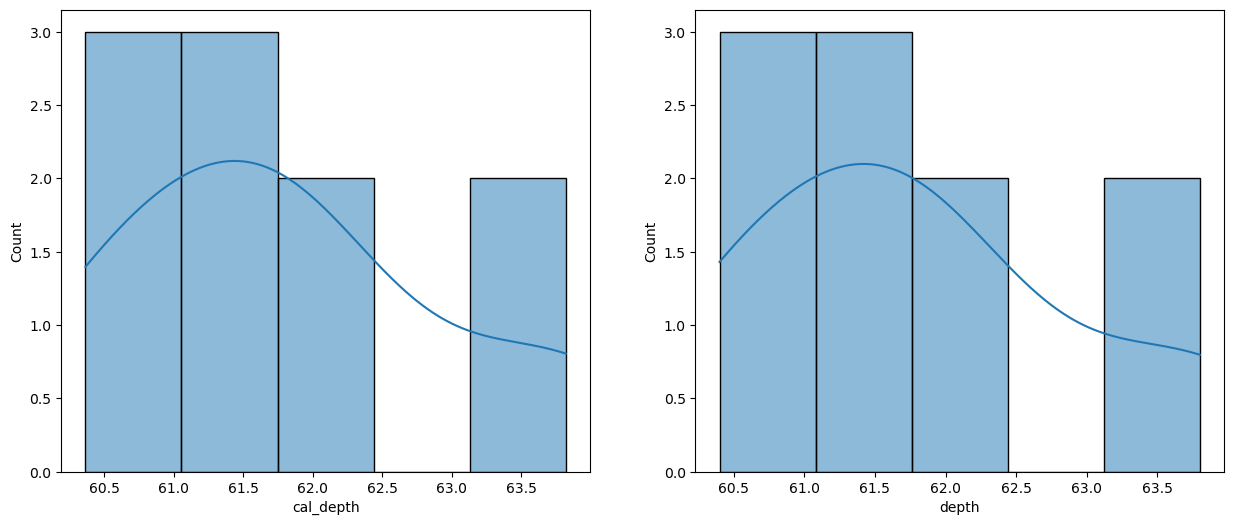

In [25]:
fig, ax = plt.subplots(ncols=2,figsize = (15,6))
ax = ax.ravel()

sns.histplot(data=at.head(10), x="cal_depth", kde=True, ax=ax[0])
sns.histplot(data=df_raw.head(10), x="depth", kde=True, ax=ax[1])

Observe
- เมื่อนำ X Y Z มาทำ operation ด้วยการหาอัตราส่วนระหว่างความสูงกับค่าเฉลี่ยความกว้างแล้วคิดเป็นเปอร์เซ็น ทำให้ได้ค่าที่ตรงกับข้อมูลใน depth 
- depth สามารถเป็นตัวแทนข้อมูลของ X Y Z ได้

<AxesSubplot:xlabel='cut', ylabel='table'>

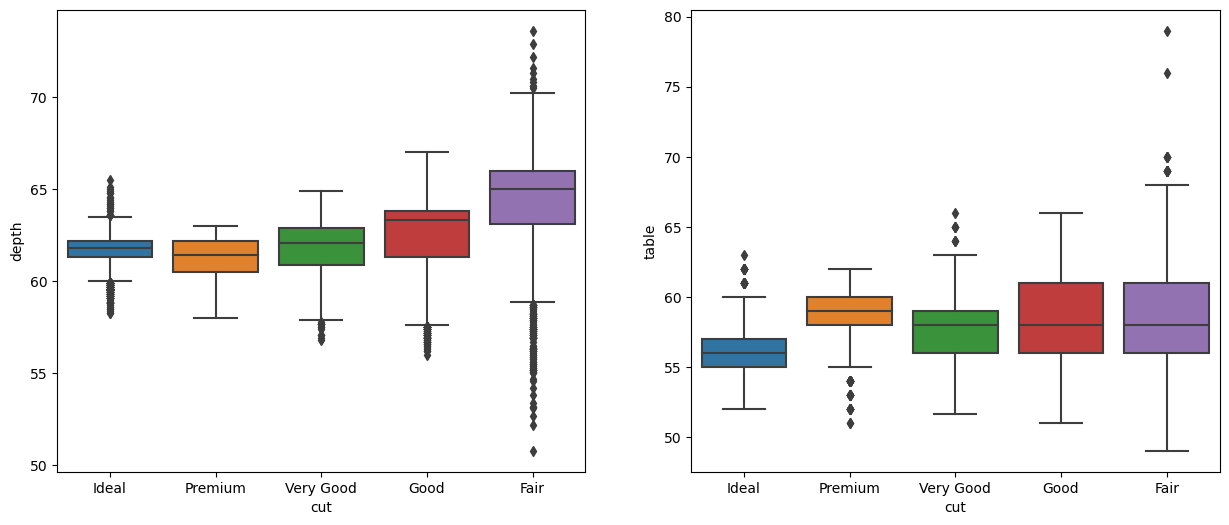

In [26]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize = (15,6))
ax = ax.ravel()
sns.boxplot(x='cut', y= df_raw['depth'], data=df_raw, ax=ax[0])
sns.boxplot(x='cut', y= df_raw['table'], data=df_raw, ax=ax[1])
# plt.show()


Observe
- เมื่อเทียบ cut กับ depth และ table แล้วจะพบว่ายิ่งคุณภาพ gem สูง จะมีช่วงของข้อมูล depth และ table ที่แคบ แต่กลับกันคุณภาพ gem ต่ำจะสามารถมีค่า depth และ table ที่กระจาย 

## Data Preprocessing

In [27]:
df_pre = df_raw.copy()

Missing Values

In [28]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [29]:
df_pre = df_pre.dropna(axis = 0, how ='any')

In [30]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26270 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26270 non-null  float64
 1   cut      26270 non-null  object 
 2   color    26270 non-null  object 
 3   clarity  26270 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26270 non-null  float64
 6   x        26270 non-null  float64
 7   y        26270 non-null  float64
 8   z        26270 non-null  float64
 9   price    26270 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.2+ MB


In [31]:
print("Old data frame length:", len(df_raw), "\nNew data frame length:", 
       len(df_pre), "\nNumber of rows with at least 1 NA value: ",
       (len(df_raw)-len(df_pre)))

Old data frame length: 26967 
New data frame length: 26270 
Number of rows with at least 1 NA value:  697


Outlier

In [32]:
df_pre.describe()

,carat,depth,table,x,y,z,price
count,26270.000000,26270.000000,26270.000000,26270.000000,26270.000000,26270.000000,26270.000000
mean,0.797995,61.745147,57.456011,5.729167,5.732967,3.536636,3937.973734
std,0.477214,1.412860,2.230776,1.127515,1.166330,0.699335,4022.189341
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5361.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,8.060000,18818.000000


Observe
- X, Y, Z ที่มีค่าเป็น 0 เป็น outlier
- ทำการ remove outlier ตามกฏ 1.5IQR เฉพาะ feature X, Y และ Z

In [33]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [34]:
for i in ['x', 'y', 'z']:
    lr,ur=remove_outlier(df_pre[i])
    # print(lr,ur)
    df_pre=df_pre[(df_pre[i]>(lr)) & (df_pre[i]<ur)]

In [35]:
dip = df_pre.shape
print('Rows : ' + str(dip[0]))
print('Columns : ' + str(dip[1]))

Rows : 26244
Columns : 10


In [36]:
df_pre.describe()

,carat,depth,table,x,y,z,price
count,26244.00000,26244.000000,26244.000000,26244.000000,26244.000000,26244.000000,26244.000000
mean,0.79625,61.745127,57.454481,5.727111,5.729024,3.536393,3929.555060
std,0.47289,1.411300,2.229472,1.122147,1.114073,0.693445,4011.100686
min,0.20000,50.800000,49.000000,3.730000,3.710000,1.530000,326.000000
25%,0.40000,61.000000,56.000000,4.710000,4.717500,2.900000,945.000000
50%,0.70000,61.800000,57.000000,5.690000,5.700000,3.520000,2371.000000
75%,1.04250,62.500000,59.000000,6.540000,6.540000,4.040000,5350.250000
max,3.01000,73.600000,79.000000,9.300000,9.200000,5.730000,18818.000000


After remove outlier

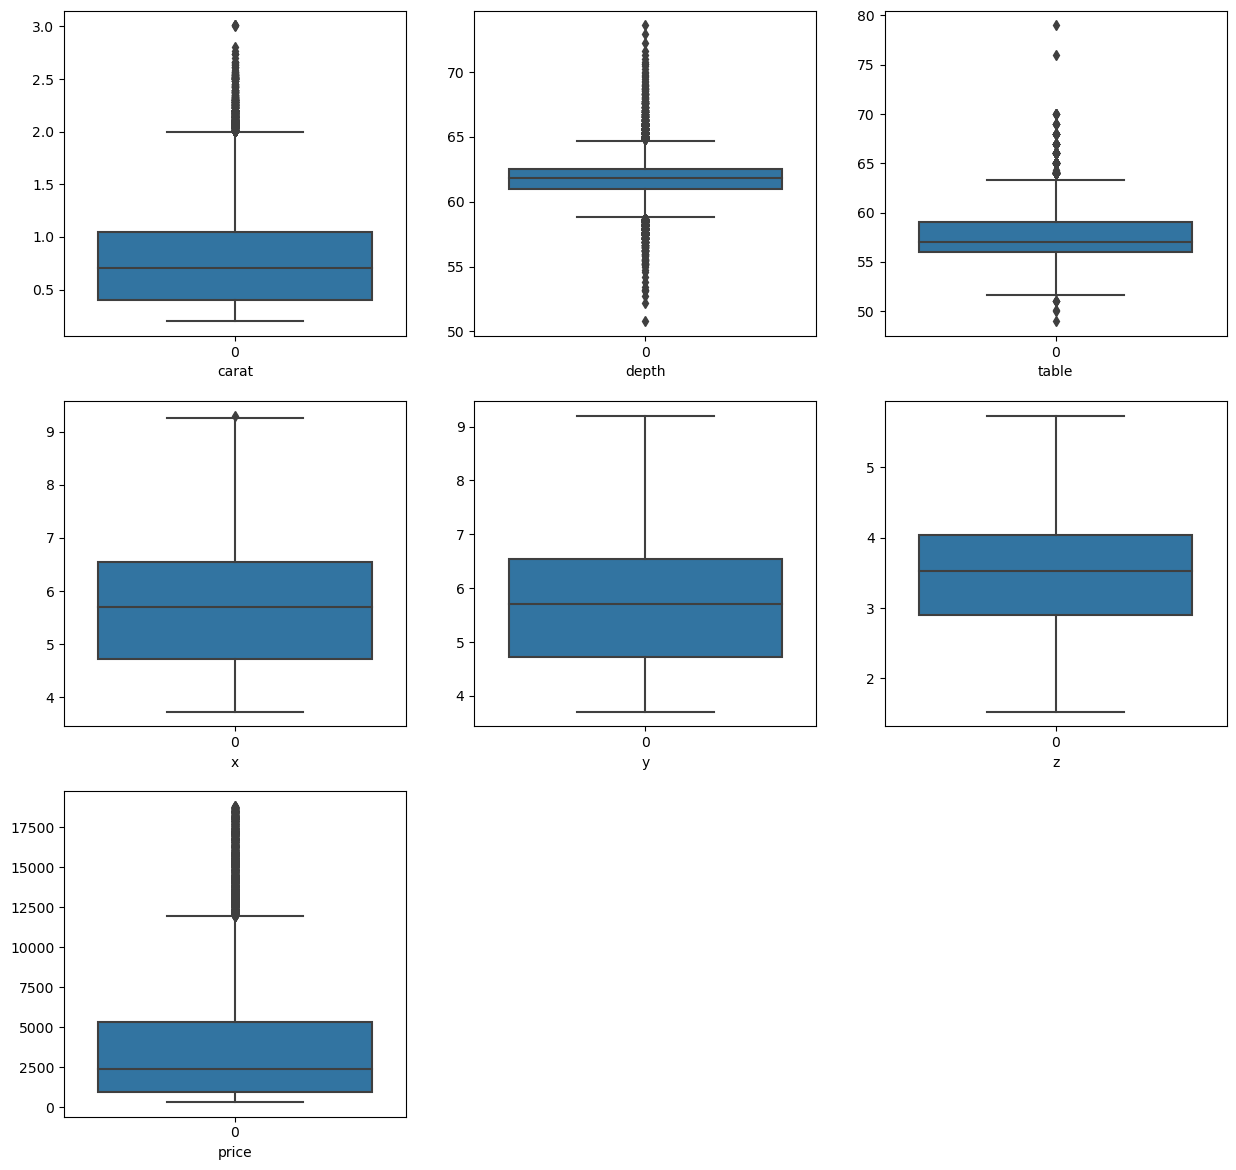

In [37]:
plt.figure(figsize=(15,60), facecolor='white')
plotnumber =1
for feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df_pre[feature],whis=1.5)
    # sns.boxplot(x='Attrition_Flag', y= df_raw[feature], data=df_raw)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

Feature Selection

เลือกใช้ 
- depth
- table
- carat
- cut
- color
- clarity
- price

In [38]:
cut_cols = ['x', 'y', 'z']
df_pre.drop(cut_cols,axis=1, inplace=True)

In [39]:
dip = df_pre.shape
print('Rows : ' + str(dip[0]))
print('Columns : ' + str(dip[1]))

Rows : 26244
Columns : 7


Feature Extraction

In [40]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [41]:
df_new = df_pre.copy()

1. Label Encoding

กำหนดให้ข้อมูลที่บ่งบอกถึงคุณภาพดีมีค่ามากสุดและลดลงตามลำดับ

In [42]:
# Label Encoding
df_new['cut']       =   df_new['cut'].map({'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5})
df_new['color']     =   df_new['color'].map({'D':7,'E':6,'F':5,'G':4,'H':3,'I':2,'J':1})
df_new['clarity']   =   df_new['clarity'].map({'I1':1,'SI2':2,'SI1':3,'VS2':4,'VS1':5,'VVS2':6,'VVS1':7,'IF':8})
df_new['cut']       =   df_new['cut'].astype(int)
df_new['color']     =   df_new['color'].astype(int)
df_new['clarity']   =   df_new['clarity'].astype(int)

In [43]:
df_new.head()

,carat,cut,color,clarity,depth,table,price
0,0.30,5,6,3,62.1,58.0,499
1,0.33,4,4,8,60.8,58.0,984
2,0.90,3,6,6,62.2,60.0,6289
3,0.42,5,5,5,61.6,56.0,1082
4,0.31,5,5,7,60.4,59.0,779


2. Scaler by Min-Max scaler

In [44]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df_new)

In [45]:
z = pd.DataFrame(X,columns= list(df_new.columns))
z.head()

,carat,cut,color,clarity,depth,table,price
0,0.035587,1.00,0.833333,0.285714,0.495614,0.300000,0.009355
1,0.046263,0.75,0.500000,1.000000,0.438596,0.300000,0.035583
2,0.249110,0.50,0.833333,0.714286,0.500000,0.366667,0.322464
3,0.078292,1.00,0.666667,0.571429,0.473684,0.233333,0.040883
4,0.039146,1.00,0.666667,0.857143,0.421053,0.333333,0.024497


## K-Mean Clustering

In [46]:
from sklearn.cluster import KMeans

find the number of cluster by Elbow Method

In [47]:
ssd = []
for i in range(2,10):
    m = KMeans(n_clusters=i)
    m.fit(X)
    ssd.append([i,m.inertia_])
for j,k in ssd:
    print('Cluster : {} Scores : {}'.format(j,k))

Cluster : 2 Scores : 6074.740107240543
Cluster : 3 Scores : 4928.32738633327
Cluster : 4 Scores : 4184.043594236869
Cluster : 5 Scores : 3641.6021509280426
Cluster : 6 Scores : 3249.054844890964
Cluster : 7 Scores : 3021.606111419305
Cluster : 8 Scores : 2819.369300541219
Cluster : 9 Scores : 2670.075206191797


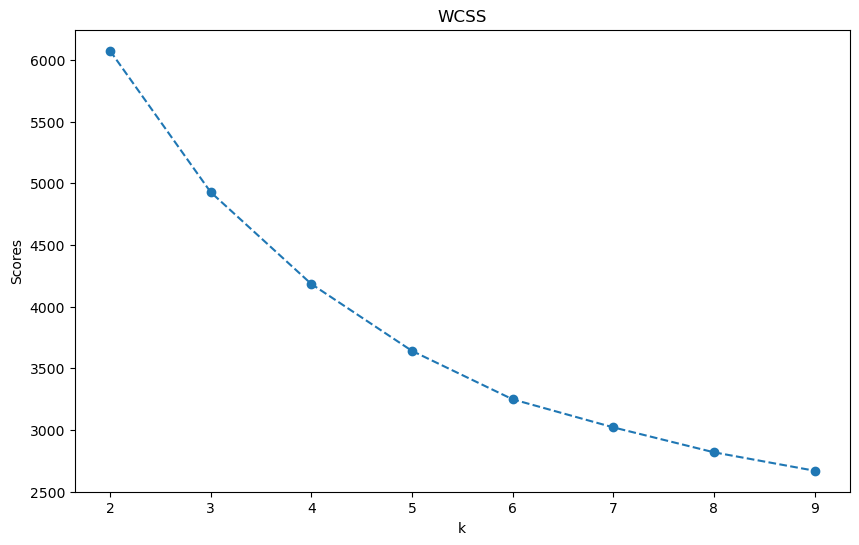

In [48]:
xy = np.array(ssd)
plt.figure(figsize=(10,6))
plt.plot(xy[:,0],xy[:,1],linestyle ='--',marker='o')
plt.title('WCSS')
plt.ylabel('Scores')
plt.xlabel('k');

- Select 5 cluster เนื่องจากค่า inertia ลดลงไม่มากเมื่อเทียบกับ 4 และ 6 cluster 


Silhouette Score

In [49]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [50]:
def sil_score(x, start, end):
    sils = []
    for k in range(start,end+1):
        m = KMeans(n_clusters=k)
        m.fit(x)
        silhouette_avg = silhouette_score(x, m.labels_).round(4)
        sils.append([silhouette_avg, k])
        
    return sils

In [51]:
ss = sil_score(X,2,7)
print(f'score = {ss}')

score = [[0.2262, 2], [0.2378, 3], [0.2217, 4], [0.2289, 5], [0.234, 6], [0.237, 7]]


- Select 5 cluster เนื่องจากค่า score ไม่ต่างกันมากเมื่อเทียบกับ 4 และ 6 cluster 

Clustering


In [52]:
K_model = KMeans(n_clusters=5)

In [53]:
K_model.fit(X)

# K_model.cluster_centers_

KMeans(n_clusters=5)

In [54]:
K_model.labels_

array([3, 0, 2, ..., 3, 2, 4])

สร้าง data frame ใหม่จากค่าที่ scale แล้ว

In [55]:
df_Km = pd.DataFrame(X,columns= list(df_pre.columns))
df_Km.head()

,carat,cut,color,clarity,depth,table,price
0,0.035587,1.00,0.833333,0.285714,0.495614,0.300000,0.009355
1,0.046263,0.75,0.500000,1.000000,0.438596,0.300000,0.035583
2,0.249110,0.50,0.833333,0.714286,0.500000,0.366667,0.322464
3,0.078292,1.00,0.666667,0.571429,0.473684,0.233333,0.040883
4,0.039146,1.00,0.666667,0.857143,0.421053,0.333333,0.024497


เพิ่ม cluster ที่ได้จากการทำ K-means ลงใน data frame

In [56]:
df_Km['Cluster'] = K_model.labels_
df_Km.head()

,carat,cut,color,clarity,depth,table,price,Cluster
0,0.035587,1.00,0.833333,0.285714,0.495614,0.300000,0.009355,3
1,0.046263,0.75,0.500000,1.000000,0.438596,0.300000,0.035583,0
2,0.249110,0.50,0.833333,0.714286,0.500000,0.366667,0.322464,2
3,0.078292,1.00,0.666667,0.571429,0.473684,0.233333,0.040883,0
4,0.039146,1.00,0.666667,0.857143,0.421053,0.333333,0.024497,0


<AxesSubplot:xlabel='Cluster', ylabel='count'>

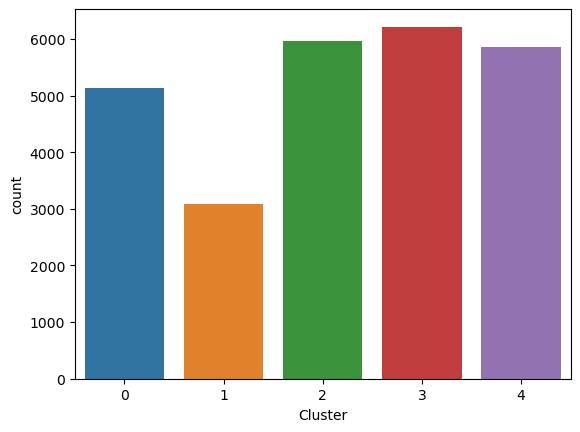

In [57]:
sns.countplot(x='Cluster',data=df_Km)

In [58]:
df_Km['Cluster'].value_counts()

3    6215
2    5957
4    5861
0    5130
1    3081
Name: Cluster, dtype: int64

In [59]:
cols = ['carat', 'cut', 'color', 'clarity', 'depth', 'table','price']

ทำการ plot กราฟแสดงความสัมพันธ์ระหว่างแต่ละตัวแปรกับ Cluster โดยใช้กราฟ box plot

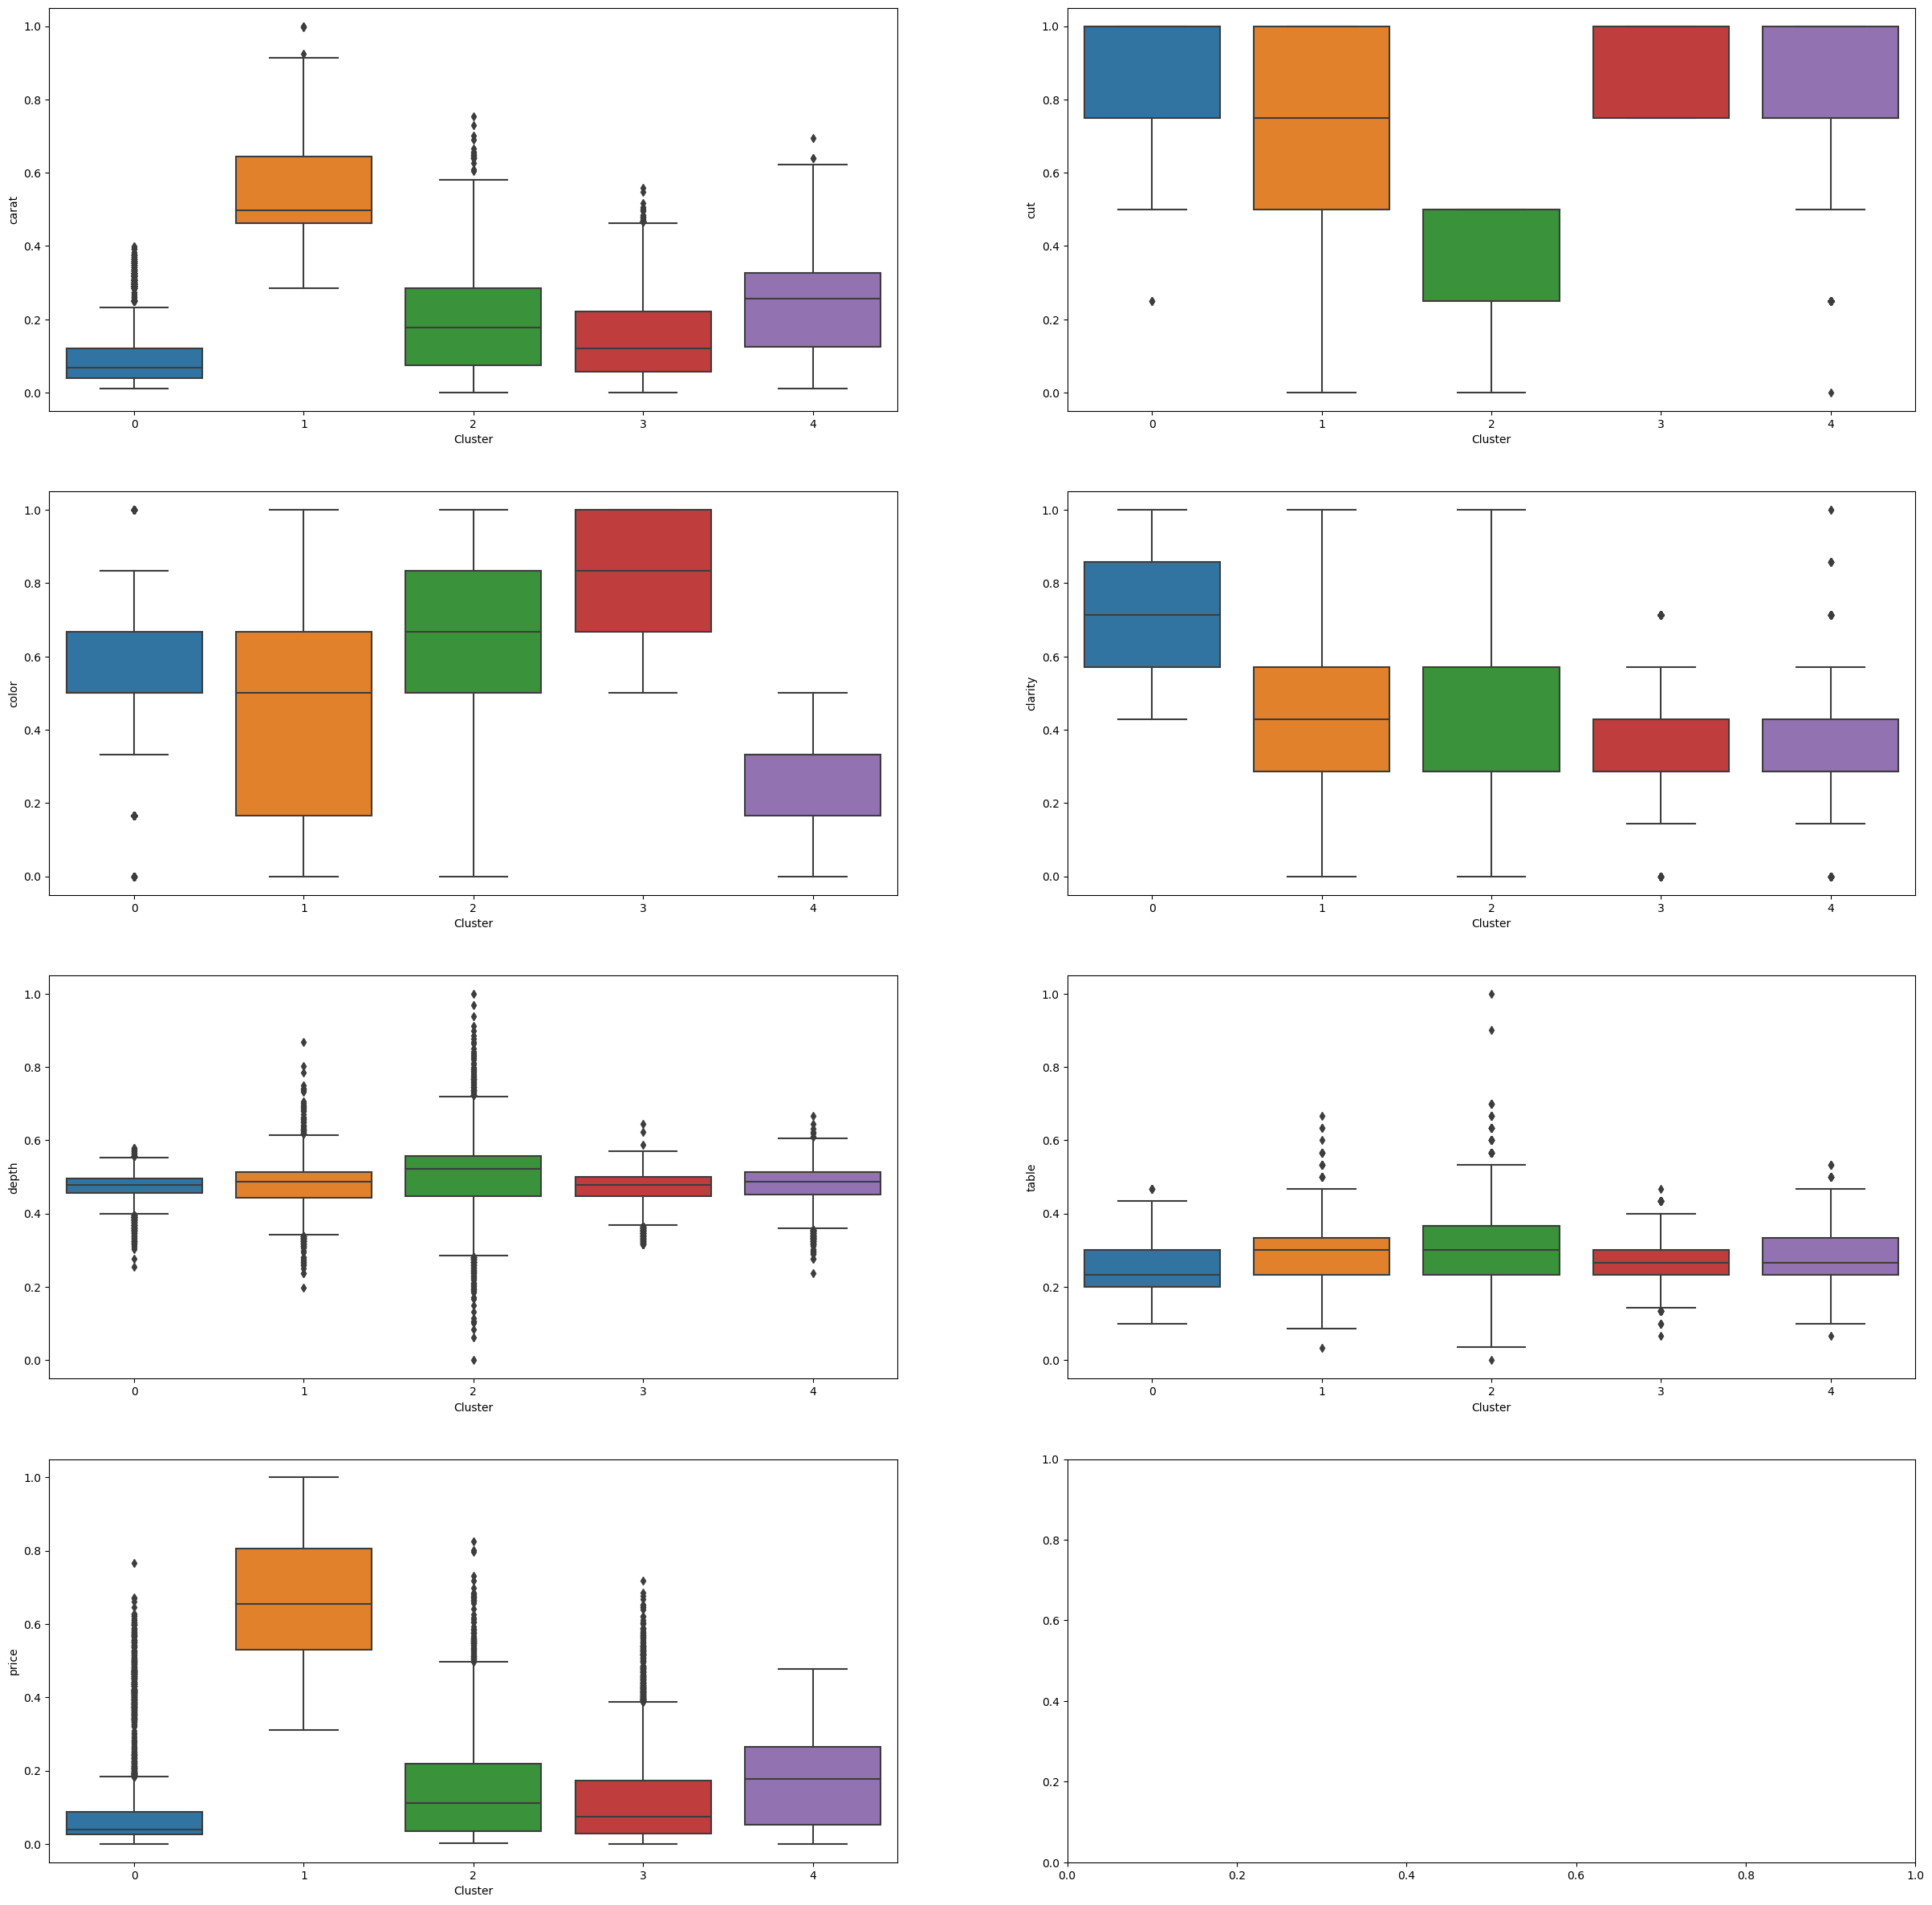

In [60]:
fig, ax = plt.subplots(nrows=4,ncols=2,figsize = (30,30))
ax = ax.ravel()
for i, col in enumerate(cols):
    sns.boxplot(x = 'Cluster',y=col,data = df_Km,ax = ax[i])

Observe
- เมื่อดูที่กราฟ carat จะสังเกตได้ว่า cluster 1 มีน้ำหนักที่เยอะที่สุด ส่วน cluster 2 ,3 ,4 มีน้ำหนักปานกลาง ส่วนcluster 0 มีน้ำหนักน้อยที่สุด
- เมื่อดูที่กราฟ cut จะสังเกตได้ว่า cluster 0 ,1 ,3 ,4 มีคุณภาพการตัดที่ค่อนข้างดี ส่วน cluster 2 มีคุณภาพการตัดที่แย่ที่สุด
- เมื่อดูที่กราฟ color จะสังเกตได้ว่า cluster 3 ให้คุณภาพสีที่ดีที่สุด และ cluster 4 มีคุณภาพสีที่แย่ที่สุด
- เมื่อดูที่กราฟ clearity จะสังเกตได้ว่า cluster 0 มีความใสมากที่สุด ส่วน cluster อื่นๆ มีคุณภาพที่ใกล้เคียงกัน
- และเมื่อสังเกตกราฟ depth และ table จะพบว่าทุกๆ cluster ให้ค่าที่ใกล้เคียงกัน
   

<AxesSubplot:xlabel='Cluster', ylabel='carat'>

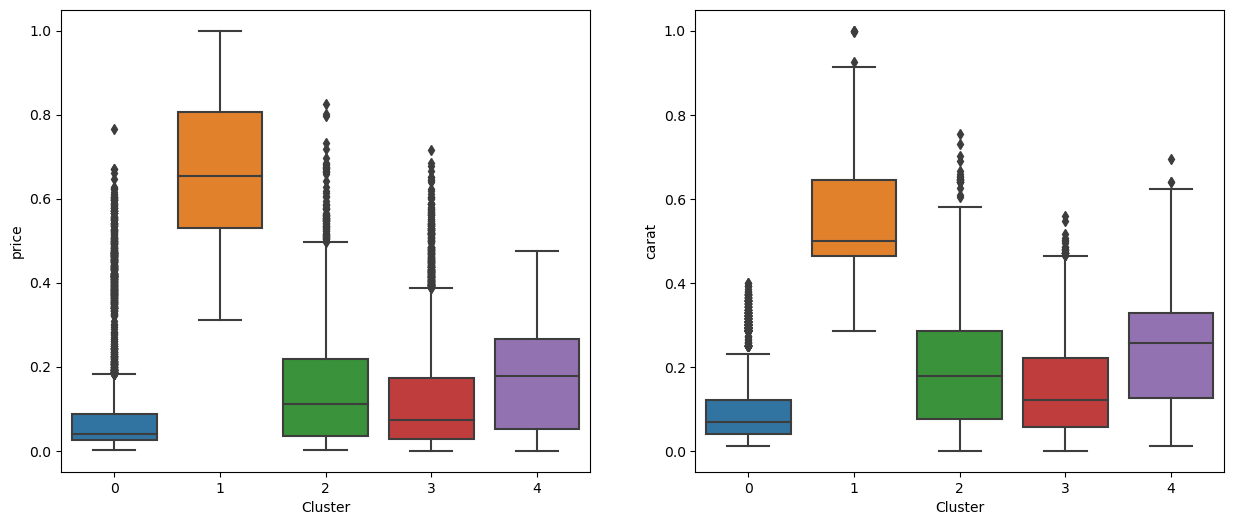

In [61]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize = (15,6))
ax = ax.ravel()
sns.boxplot(x = 'Cluster',y='price',data = df_Km, ax = ax[0])
sns.boxplot(x = 'Cluster',y='carat',data = df_Km, ax = ax[1])

Observe
- สังเกตเห็นว่า cluster ที่แบ่งใน price กับ carat มีความคล้ายคลึงกันมาก

In [62]:
cols = ['carat', 'cut', 'color', 'clarity', 'depth', 'table','price']
# df_Km

ทำการหาความสัมพันธ์ระหว่างแต่ละตัวแปรกับแต่ละ Cluster โดยใช้ Heatmap

<AxesSubplot:ylabel='Cluster'>

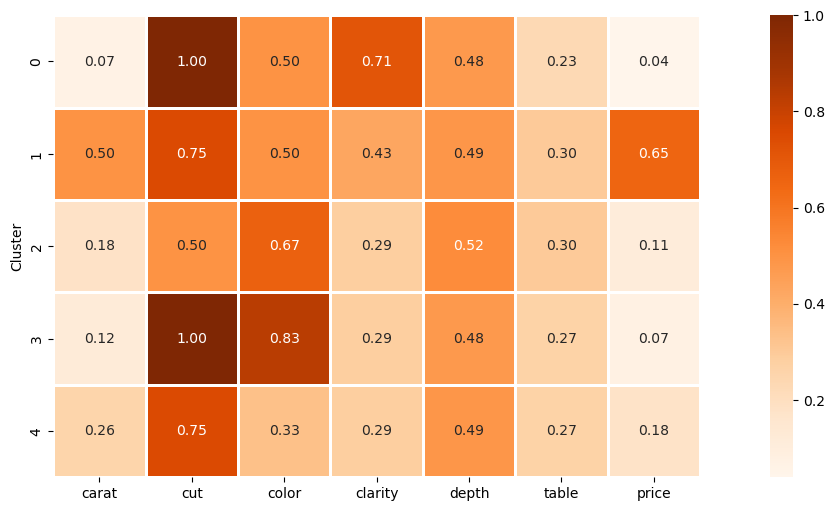

In [63]:
fig= plt.subplots(figsize = (18,6))
sns.heatmap(df_Km[df_Km.columns].groupby('Cluster').median(),cmap='Oranges',linewidths=1,
            square=True, annot=True ,fmt='.2f')

Observe
- price   ของ cluster ที่ 1 มีค่าสูงสุด และ cluster ที่ 0 มีค่าต่ำสุด
- carat   ของ cluster ที่ 1 มีค่าสูงสุด และ cluster ที่ 0 มีค่าต่ำสุด
- cut     ของ cluster ที่ 0,1,3,4 มีค่าสูงใกล้เคียงกัน และ cluster ที่ 2 มีค่าต่ำสุด
- color   ของ cluster ที่ 3 มีค่าสูงสุด และ cluster ที่ 4 มีค่าต่ำสุด
- clarity ของ cluster ที่ 0 มีค่าสูงสุด และ cluster อื่นๆมีค่าใกล้เคียงกัน
- depth   ของทุกๆ cluster มีค่าใกล้เคียงกัน
- table   ของทุกๆ cluster มีค่าใกล้เคียงกัน

ทำการ plot กราฟแสดงความสัมพันธ์ระหว่างแต่ละตัวแปร เพื่อดูการแบ่งกลุ่มของทั้ง 5 cluster ดังนี้

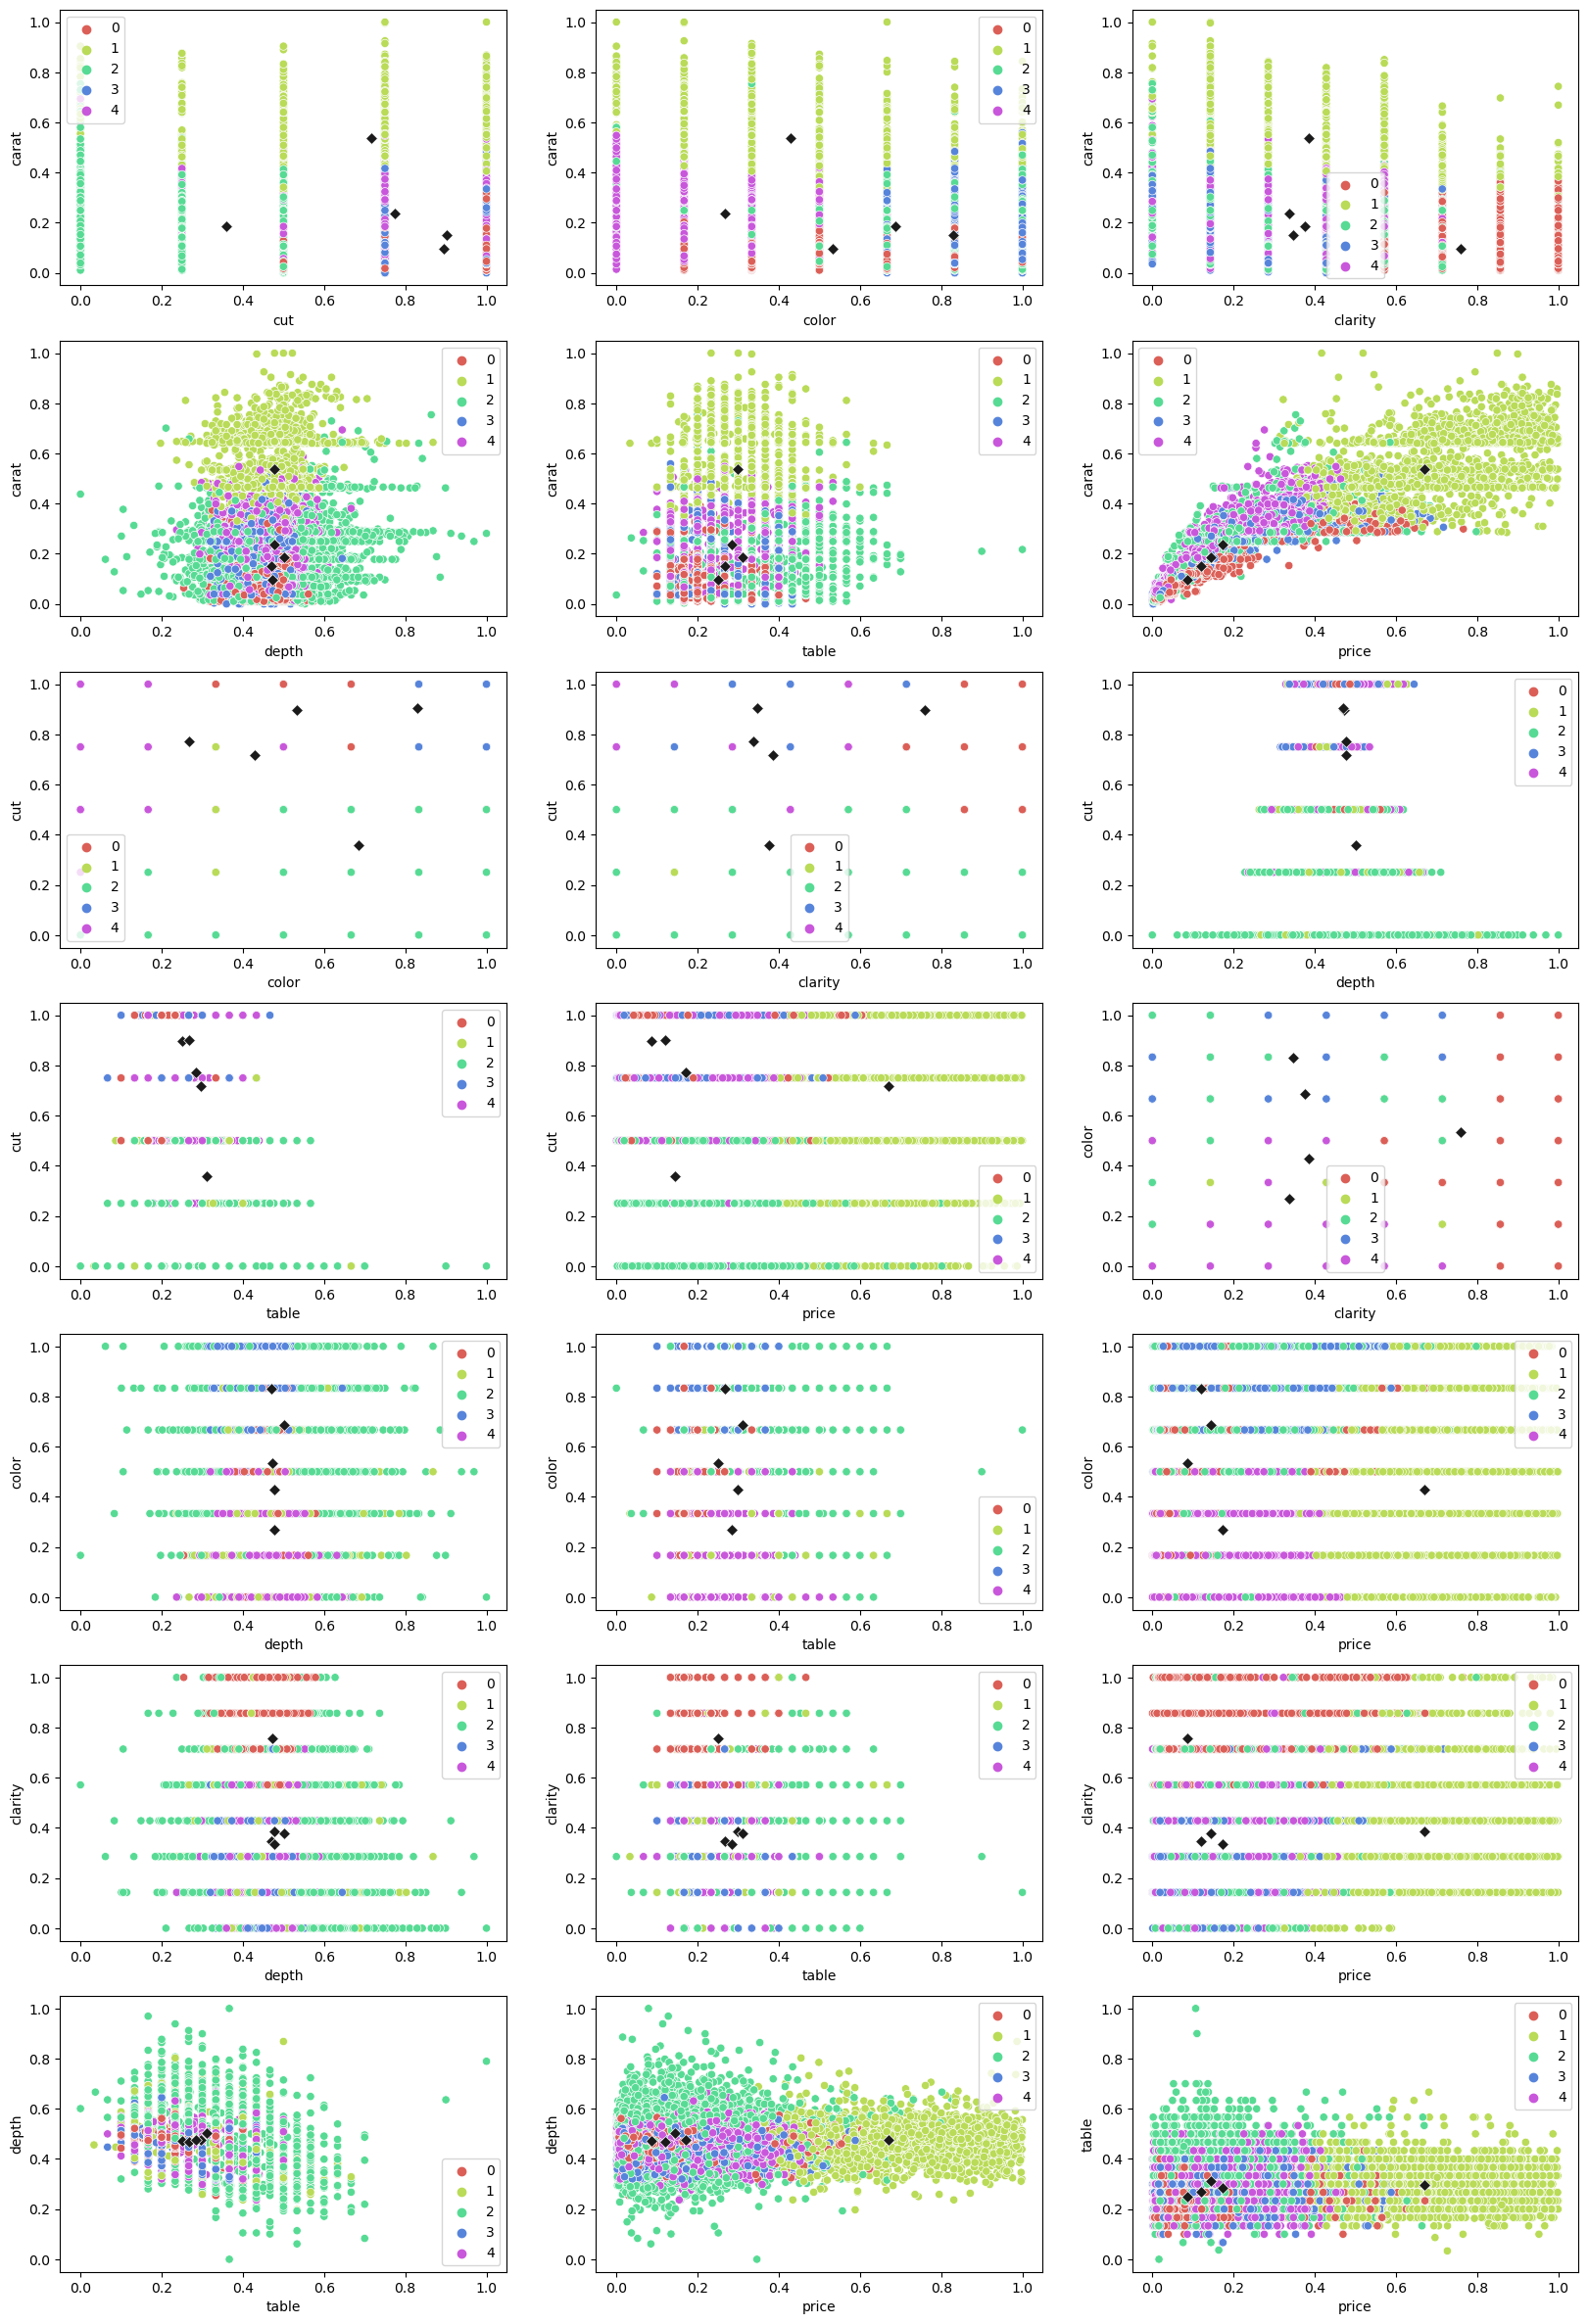

In [64]:
fig, ax = plt.subplots(nrows=7,ncols=3,figsize = (20,30))
ax = ax.ravel()
c = 0
for n in range(df_Km.shape[1]-1):
    for k in range(n+1,df_Km.shape[1]-1):
        sns.scatterplot(x=df_Km[cols[k]], y=df_Km[cols[n]], 
                        data=df_Km,hue=K_model.labels_,alpha=1,palette=sns.color_palette('hls', K_model.n_clusters),ax=ax[c]);
        sns.scatterplot(x=K_model.cluster_centers_[:,k],y=K_model.cluster_centers_[:,n],
                        data=K_model.cluster_centers_,color = '.1',marker='D',ax=ax[c]);
        # plt.legend(title='Cluster')
        plt.xlabel(cols[k])
        plt.ylabel(cols[n])
        c+=1

## Hierachical Clustering

เลือกใช้ K = 5 เช่นเดียวกันกับ KMeans

In [65]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [66]:
df_h = pd.DataFrame(X, columns = cols)
df_h.head()

,carat,cut,color,clarity,depth,table,price
0,0.035587,1.00,0.833333,0.285714,0.495614,0.300000,0.009355
1,0.046263,0.75,0.500000,1.000000,0.438596,0.300000,0.035583
2,0.249110,0.50,0.833333,0.714286,0.500000,0.366667,0.322464
3,0.078292,1.00,0.666667,0.571429,0.473684,0.233333,0.040883
4,0.039146,1.00,0.666667,0.857143,0.421053,0.333333,0.024497


ตัวอย่างการทำ hierachical Clustering ด้วย 100 simples


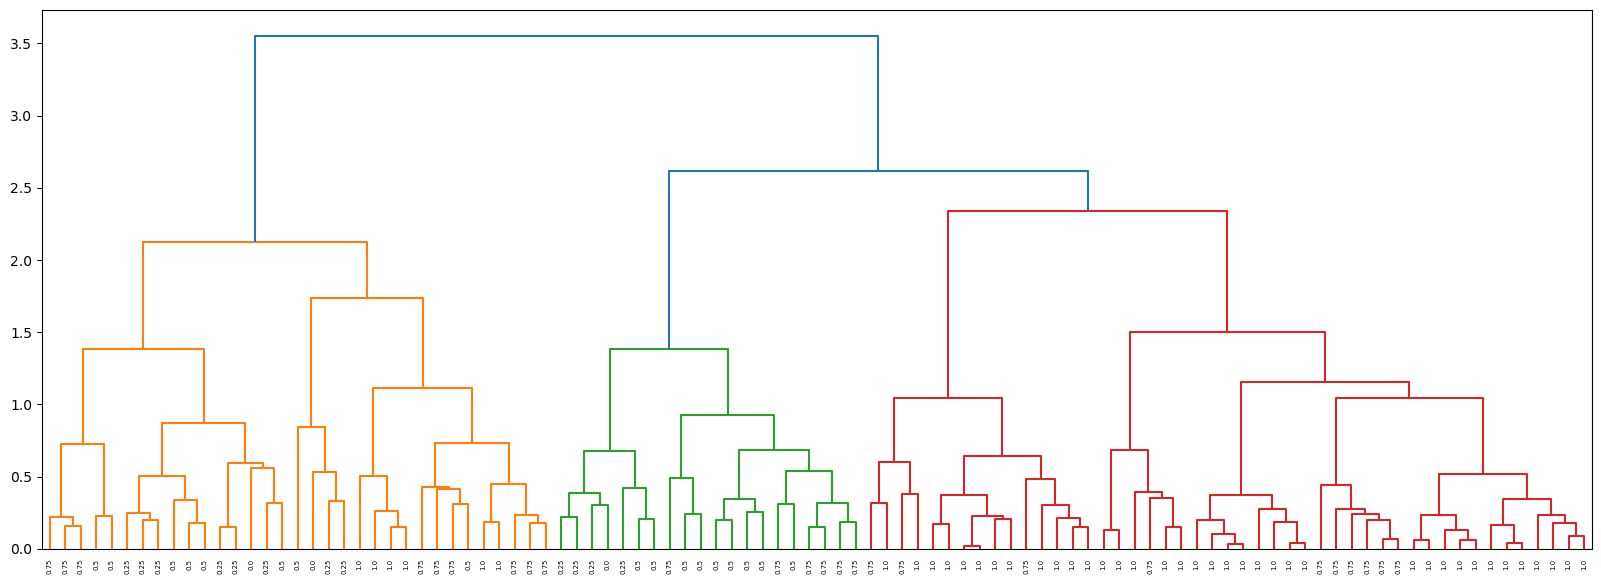

In [67]:
fig, ax = plt.subplots(figsize = (20,7))
dg = sch.dendrogram(sch.linkage(df_h.head(100), method = 'ward'),ax=ax, labels=df_h['cut'][:100].values)

In [68]:
hc = AgglomerativeClustering(n_clusters=5, linkage='ward')
hc

AgglomerativeClustering(n_clusters=5)

In [69]:
hc.fit(df_h)

AgglomerativeClustering(n_clusters=5)

In [70]:
df_h['Cluster'] = hc.labels_
df_h.head()

,carat,cut,color,clarity,depth,table,price,Cluster
0,0.035587,1.00,0.833333,0.285714,0.495614,0.300000,0.009355,3
1,0.046263,0.75,0.500000,1.000000,0.438596,0.300000,0.035583,0
2,0.249110,0.50,0.833333,0.714286,0.500000,0.366667,0.322464,4
3,0.078292,1.00,0.666667,0.571429,0.473684,0.233333,0.040883,0
4,0.039146,1.00,0.666667,0.857143,0.421053,0.333333,0.024497,0


<AxesSubplot:xlabel='Cluster', ylabel='count'>

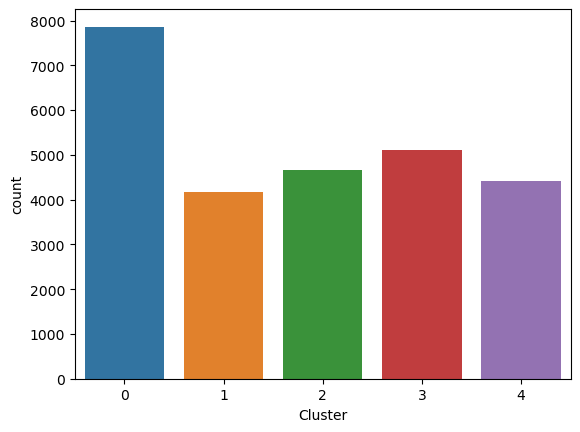

In [71]:
sns.countplot(x='Cluster',data=df_h)

In [73]:
df_h['Cluster'].value_counts()

0    7862
3    5119
2    4668
4    4423
1    4172
Name: Cluster, dtype: int64

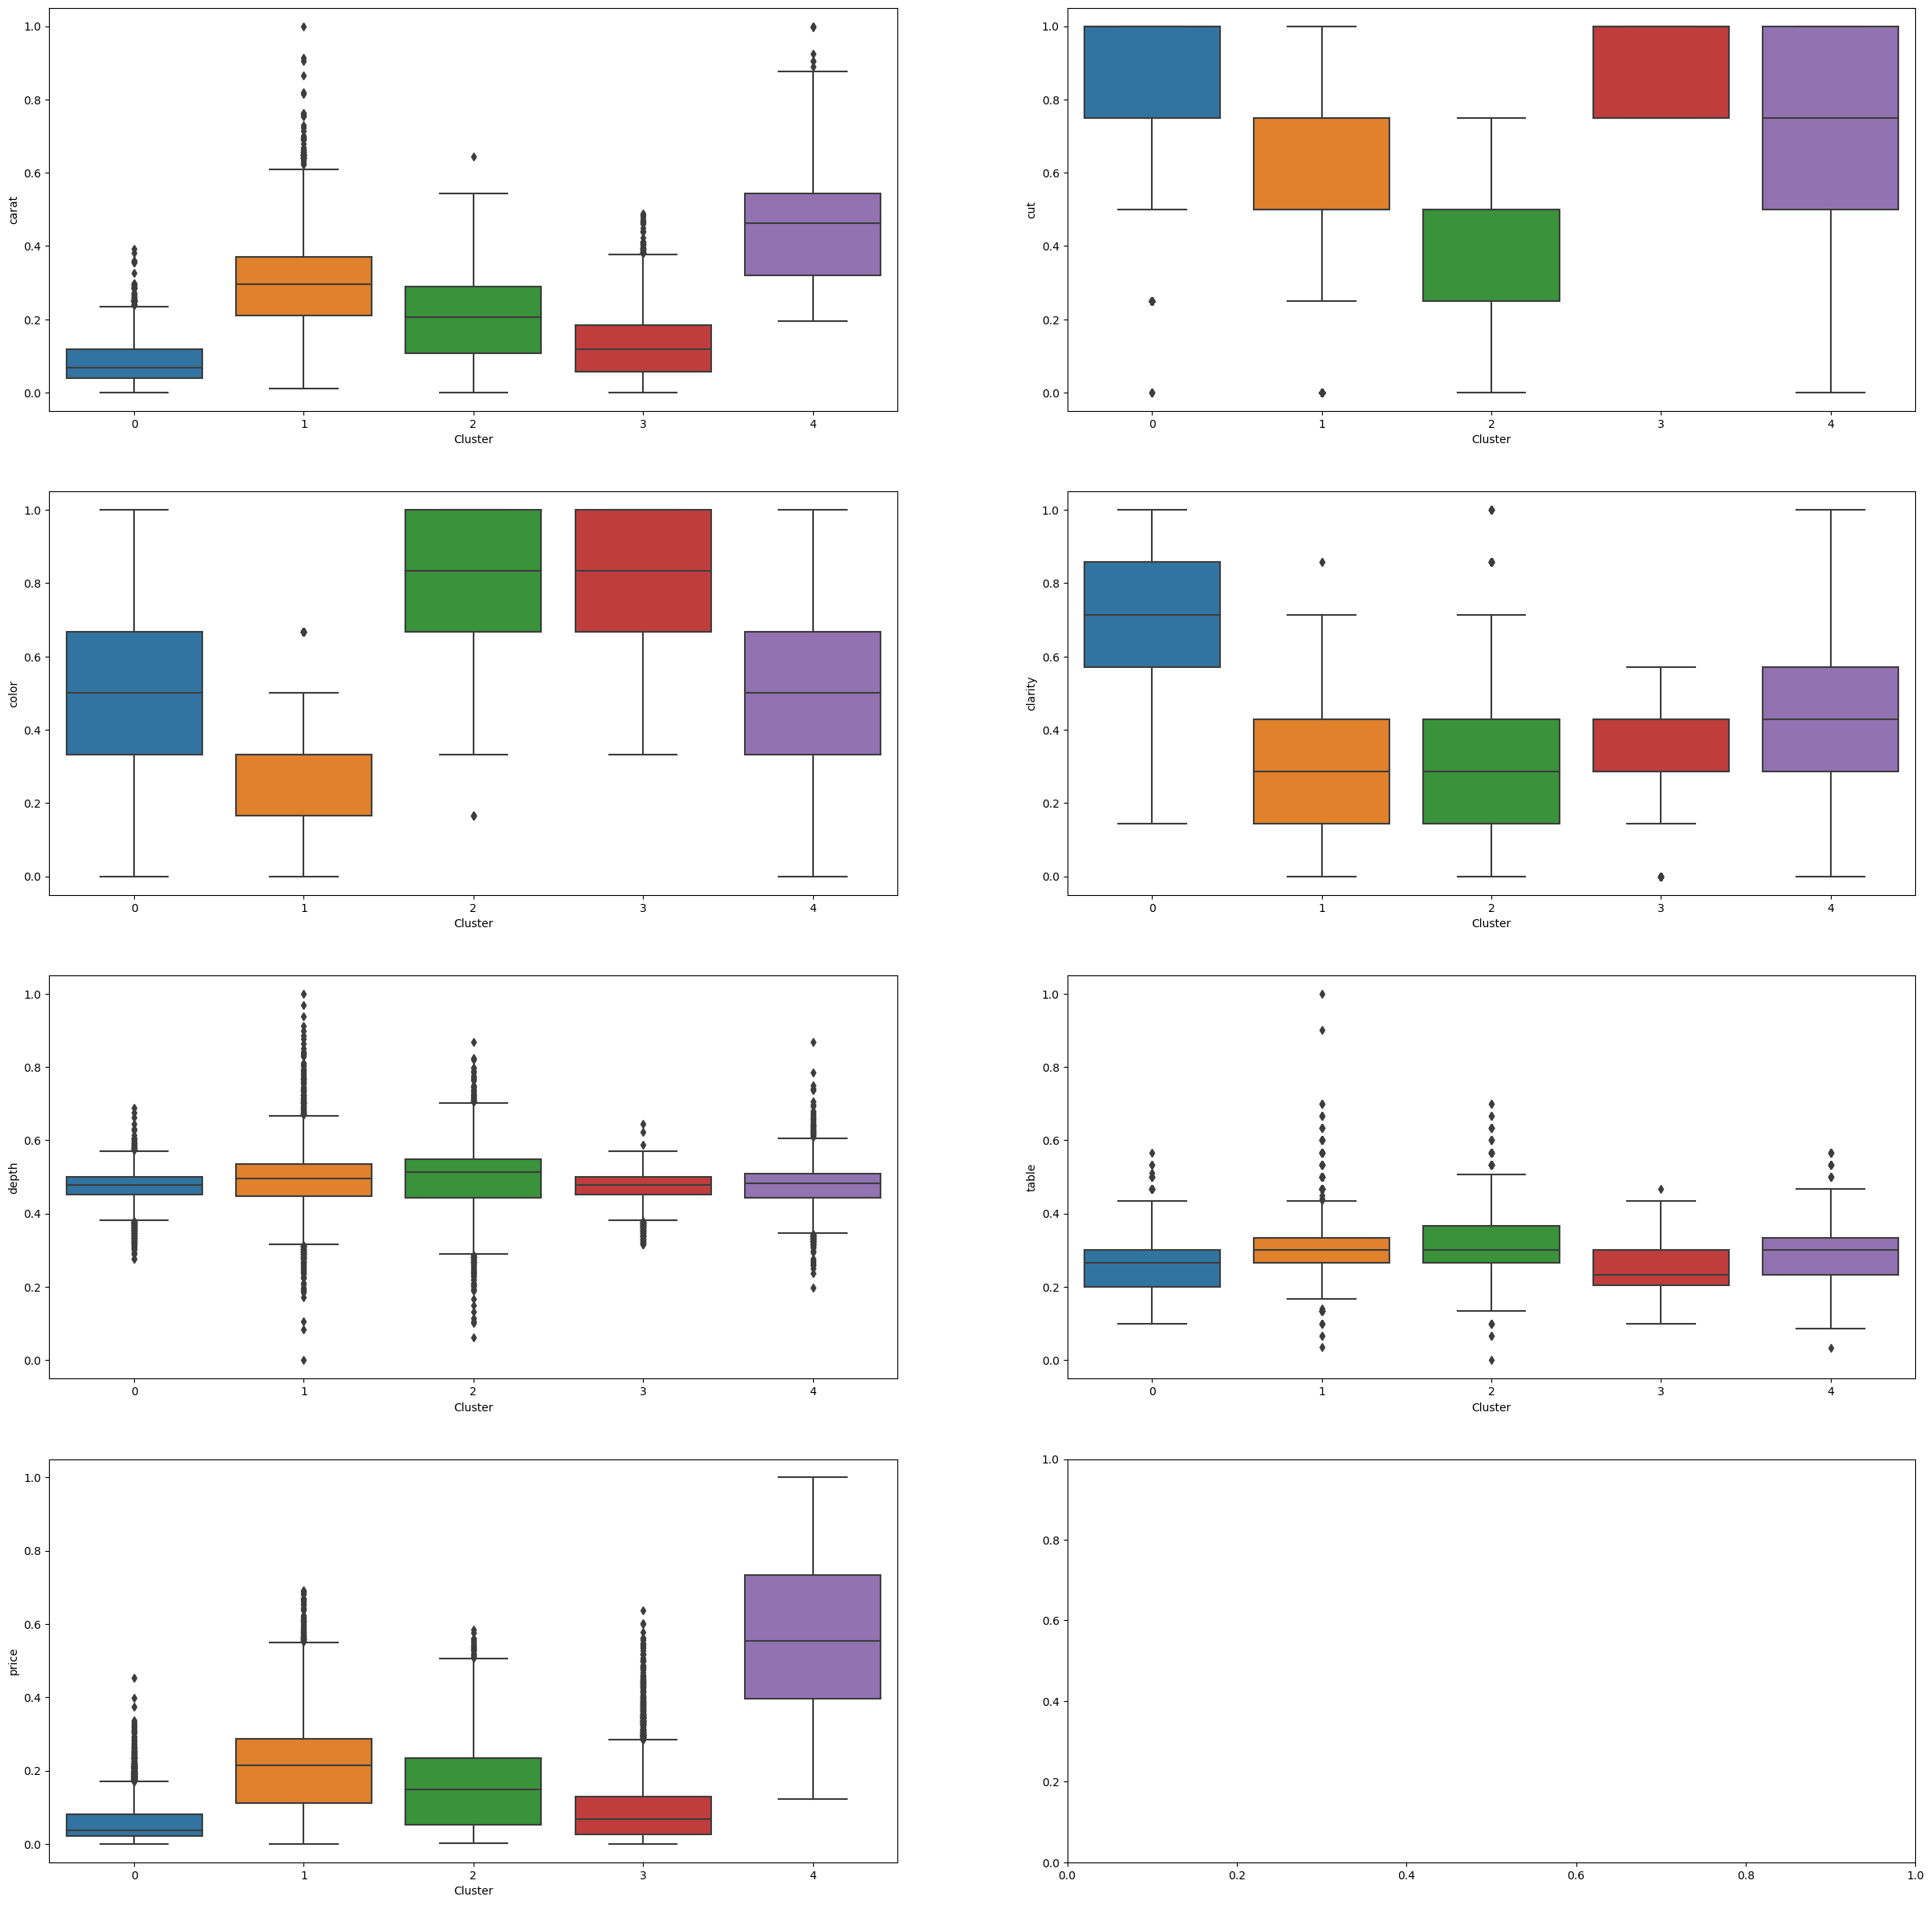

In [72]:
fig, ax = plt.subplots(nrows=4,ncols=2,figsize = (30,30))
ax = ax.ravel()
for i, col in enumerate(cols):
    sns.boxplot(x = 'Cluster',y=col,data = df_h,ax = ax[i])

Observe
- จากกราฟจะเห็นได้ว่า กราฟที่ได้จาก Hierachical Clustering มีการแบ่งกลุ่มที่ให้ผลลัพธ์ที่เหมือนกับการแบ่งกลุ่มโดยใช้ K-Means Clustering

## Conclusion

- จากการทำ clustering ได้พบว่าราคา(price) ของ gem จะขึ้นอยู่กับน้ำหนัก(carat) โดยตรง


การแบ่งกลุ่มด้วยวิธี K-Means และ Hierarchical Clustering ให้ผลลัพธ์เหมือนกัน โดยจะจำแนกอัญมณีออกเป็น 5 กลุ่ม เพื่อใช้เลือกอัญมณีให้ตอบโจทย์ต่อความต้องการและกำลังทรัพย์ของผู้ซื้อ โดยสามารถแบ่งออกมาได้ดังนี้



- กลุ่มที่ 1 จะเป็นกลุ่มที่มีอัญมณีราคาสูง เนื่องจากเป็นอัญมณีที่มีน้ำหนักมาก มีคุณภาพการตัดที่ดี และมีคุณภาพสีกับคุณภาพความใสของอัญมณีที่อยู่ระดับปานกลาง 
เหมาะสำหรับลูกค้าที่มีกำลังทรัพย์สูง และมีความต้องการในการซื้ออัญมณีที่มีคุณภาพสูง
- กลุ่มที่ 2 จะเป็นกลุ่มที่มีอัญมณีราคาปานกลาง เนื่องจากมีน้ำหนัก ,สี และ ความใสของอัญมณีที่อยู่ระดับปานกลาง แต่มีคุณภาพการตัดที่ต่ำ 
เหมาะสำหรับลูกค้าที่มีกำลังทรัพย์ปานกลาง และไม่มีปัญหากับเรื่องคุณภาพการตัด
- กลุ่มที่ 3 จะเป็นกลุ่มที่มีอัญมณีราคาปานกลาง เนื่องจากมีคุณภาพสีและคุณภาพการตัดที่สูง มีน้ำหนักอยู่ในระดับปานกลาง แต่คุณภาพความใสของอัญมณีต่ำ 
เหมาะสำหรับลูกค้าที่มีกำลังทรัพย์ปานกลาง และไม่มีปัญหากับเรื่องคุณภาพความใส
- กลุ่มที่ 4 จะเป็นกลุ่มที่มีอัญมณีราคาปานกลาง เนื่องจากมีคุณภาพการตัดที่สูง มีน้ำหนักอยู่ในระดับปานกลางค่อนข้างสูง แต่คุณภาพความใสและคุณภาพสีของอัญมณีต่ำ 
เหมาะสำหรับลูกค้าที่มีกำลังทรัพย์ปานกลาง มีความต้องการอัญมณีที่มีขนาดใหญ่และไม่มีปัญหากับเรื่องคุณภาพความใสและคุณภาพสีของอัญมณี
- กลุ่มที่ 0 จะเป็นกลุ่มที่มีอัญมณีราคาต่ำ เนื่องจากมีน้ำหนักที่น้อย แต่มีคุณภาพที่ใกล้เคียงกับอัญมณีกลุ่มที่ 1 
เหมาะสำหรับลูกค้าที่ต้องการอัญมณีขนาดเล็กที่มีคุณภาพสูง

